# Network Intrusion Detection System- Binomial

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
#Load  train dataset
train1= pd.read_csv('Train.txt')

In [3]:
train1.head(5)

0  tcp ftp_data   SF  491   0.1  0.2  0.3  0.4  0.5 ...  0.17.1  0.03  \
0  0  udp    other   SF  146     0    0    0    0    0 ...    0.00  0.60   
1  0  tcp  private   S0    0     0    0    0    0    0 ...    0.10  0.05   
2  0  tcp     http   SF  232  8153    0    0    0    0 ...    1.00  0.00   
3  0  tcp     http   SF  199   420    0    0    0    0 ...    1.00  0.00   
4  0  tcp  private  REJ    0     0    0    0    0    0 ...    0.07  0.07   

   0.17.2  0.00.6  0.00.7  0.00.8  0.05  0.00.9   normal  20  
0    0.88    0.00    0.00    0.00   0.0    0.00   normal  15  
1    0.00    0.00    1.00    1.00   0.0    0.00  neptune  19  
2    0.03    0.04    0.03    0.01   0.0    0.01   normal  21  
3    0.00    0.00    0.00    0.00   0.0    0.00   normal  21  
4    0.00    0.00    0.00    0.00   1.0    1.00  neptune  21  

[5 rows x 43 columns]

In [4]:
train1.shape

(125972, 43)

Renaming the Columns-

In [5]:
train1.rename(columns={"0": "duration", "tcp": "protocol_type","ftp_data":"service","SF":"flag","491":"Src_bytes","0.1":"dst_bytes","0.2":"land","0.3":"wrong_fragment","0.4":"Urgent","0.5":"hot","0.6":"num_failed_logins","0.7":"logged_in","0.8":"num_compromised","0.9":"root_shell","0.10":"su_attempted","0.11":"num_root","0.12":"num_file_creations","0.13":"num_shells","0.14":"num_access_files","0.15":"num_outbound_cmds","0.16":"is_host_login","0.17":"is_guest_login","2":"count","2.1":"srv_count","0.00":"serror_rate","0.00.1":"srv_serror_rate","0.00.2":"rerror_rate","0.00.3":"srv_rerror_rate","1.00":"same_srv_rate","0.00.4":"diff_srv_rate","0.00.5":"srv_diff_host_rate","150":"dst_host_count","25":"dst_host_srv_count","0.17.1":"dst_host_same_srv_rate","0.03":"dst_host_diff_srv_rate","0.17.2":"dst_host_same_src_port_rate","0.00.6":"dst_host_srv_diff_host_rate","0.00.7":"dst_host_serror_rate","0.00.8":"dst_host_srv_serror_rate","0.05":"dst_host_rerror_rate","0.00.9":"dst_host_srv_rerror_rate","normal":"attack","20":"last_flag"}, inplace=True)

In [6]:
import pandas_profiling
pandas_profiling.ProfileReport(train1)

Exporting pandas profiling output to html file

In [7]:
output_train = pandas_profiling.ProfileReport(train1)

In [8]:
#Converting target variable attack into normal & attack i.e 0 &1
train1['attack']= np.where((train1.attack=='normal'),0,1)

Exploratory Data Analysis

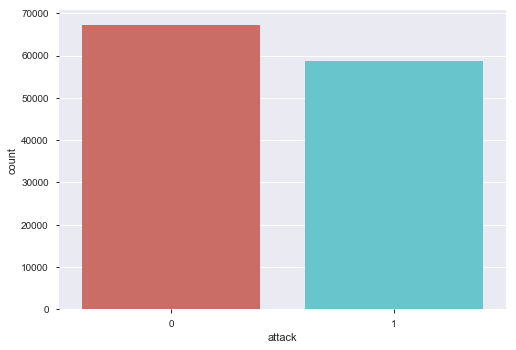

In [9]:
#dependent variable distribution (attack vs. normal)
sns.countplot(x='attack',data=train1, palette='hls')
plt.show()

C:\Users\Aanchal\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Aanchal\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


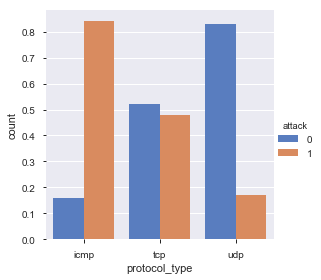

In [10]:
# 2. Attacks & non attack distribution by different Protocol types-
Protolcol_count = train1[['protocol_type', 'attack']].groupby(['protocol_type', 'attack']).size()
Protocol_count_percent = Protolcol_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()

Protocol_count_percent.columns = ['protocol_type', 'attack', 'count']

sns.factorplot(x="protocol_type", y = 'count', hue="attack", data=Protocol_count_percent,
               size=4, kind="bar", palette="muted")


It is noted the maximum number of connection attacks is caued by icmp protocol

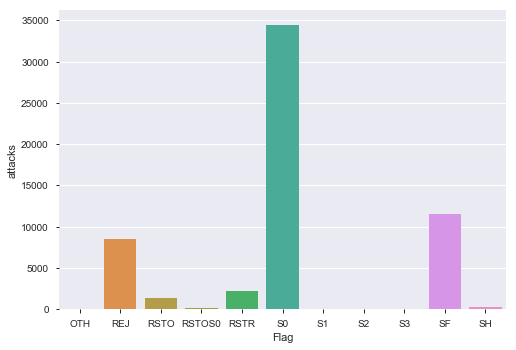

In [11]:
#Distribution of connection's status and  number of attacks
flag_attack=train1[['flag', 'attack']].groupby(['flag', 'attack']).size().reset_index()
flag_1=flag_attack[(flag_attack.attack==1)]
flag_1.columns = ['Flag', 'attack', 'attacks']
flag_count=flag_1[['Flag','attacks']]
sns.barplot(x="Flag", y= 'attacks',data=flag_count)
plt.show()

It is noted that maximum number of connection attacks is represented by SO status

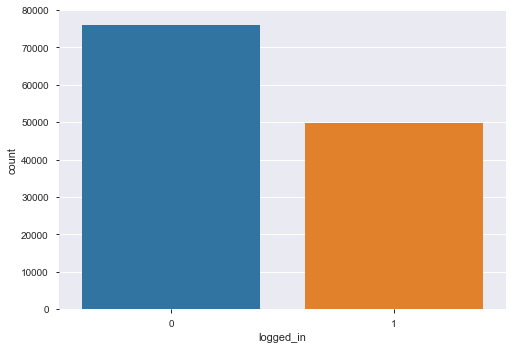

In [12]:
#System Login status distribution
sns.countplot(x="logged_in", data=train1)
plt.show()

In [13]:
#As these are binary categorical variables so make their dtype into categorical form
train1['land']=  train1['land'].astype('object')
train1['logged_in']=  train1['logged_in'].astype('object')
train1['root_shell']=  train1['root_shell'].astype('object')
train1['su_attempted']=  train1['su_attempted'].astype('object')
train1['is_host_login']=  train1['is_host_login'].astype('object')
train1['is_guest_login']=  train1['is_guest_login'].astype('object')

<b>Separating numeric & Categorical features of train data

In [14]:
numeric_var_names=[key for key in dict(train1.dtypes) if dict(train1.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(train1.dtypes) if dict(train1.dtypes)[key] in ['object','O']]
print(numeric_var_names)
print(cat_var_names)

['duration', 'Src_bytes', 'dst_bytes', 'wrong_fragment', 'Urgent', 'hot', 'num_failed_logins', 'num_compromised', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack', 'last_flag']
['protocol_type', 'service', 'flag', 'land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login']


In [16]:
numeric_var= train1[numeric_var_names]
numeric_var.head(5)

duration  Src_bytes  dst_bytes  wrong_fragment  Urgent  hot  \
0         0        146          0               0       0    0   
1         0          0          0               0       0    0   
2         0        232       8153               0       0    0   
3         0        199        420               0       0    0   
4         0          0          0               0       0    0   

   num_failed_logins  num_compromised  num_root  num_file_creations  \
0                  0                0         0                   0   
1                  0                0         0                   0   
2                  0                0         0                   0   
3                  0                0         0                   0   
4                  0                0         0                   0   

     ...      dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0    ...                        0.00                    0.60   
1    ...                        0.10                    0.05   
2    ...                        1.00                    0.00   
3    ...                        1.00                    0.00   
4    ...                        0.07                    0.07   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.88                         0.00   
1                         0.00                         0.00   
2                         0.03                         0.04   
3                         0.00                         0.00   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                   0.0   
1                  1.00                      1.00                   0.0   
2                  0.03                      0.01                   0.0   
3                  0.00                      0.00                   0.0   
4                  0.00                      0.00                   1.0   

   dst_host_srv_rerror_rate  attack  last_flag  
0                      0.00       0         15  
1                      0.00       1         19  
2                      0.01       0         21  
3                      0.00       0         21  
4                      1.00       1         21  

[5 rows x 34 columns]

In [17]:
cat_var= train1[cat_var_names]
cat_var.head(5)

protocol_type  service flag land logged_in root_shell su_attempted  \
0           udp    other   SF    0         0          0            0   
1           tcp  private   S0    0         0          0            0   
2           tcp     http   SF    0         1          0            0   
3           tcp     http   SF    0         1          0            0   
4           tcp  private  REJ    0         0          0            0   

  is_host_login is_guest_login  
0             0              0  
1             0              0  
2             0              0  
3             0              0  
4             0              0

In [18]:
# Creating Data audit Report for train data
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=numeric_var.apply(lambda x: var_summary(x)).T

In [19]:
num_summary

N  NMISS           SUM          MEAN  \
duration                     125972.0    0.0  3.617247e+07    287.146929   
Src_bytes                    125972.0    0.0  5.740179e+09  45567.100824   
dst_bytes                    125972.0    0.0  2.491634e+09  19779.271433   
wrong_fragment               125972.0    0.0  2.858000e+03      0.022688   
Urgent                       125972.0    0.0  1.400000e+01      0.000111   
hot                          125972.0    0.0  2.575000e+04      0.204411   
num_failed_logins            125972.0    0.0  1.540000e+02      0.001222   
num_compromised              125972.0    0.0  3.517800e+04      0.279253   
num_root                     125972.0    0.0  3.806800e+04      0.302194   
num_file_creations           125972.0    0.0  1.596000e+03      0.012669   
num_shells                   125972.0    0.0  5.200000e+01      0.000413   
num_access_files             125972.0    0.0  5.160000e+02      0.004096   
num_outbound_cmds            125972.0    0.0  0.000000e+00      0.000000   
count                        125972.0    0.0  1.059528e+07     84.108207   
srv_count                    125972.0    0.0  3.494223e+06     27.738093   
serror_rate                  125972.0    0.0  3.583737e+04      0.284487   
srv_serror_rate              125972.0    0.0  3.558553e+04      0.282488   
rerror_rate                  125972.0    0.0  1.511153e+04      0.119959   
srv_rerror_rate              125972.0    0.0  1.526582e+04      0.121184   
same_srv_rate                125972.0    0.0  8.325804e+04      0.660925   
diff_srv_rate                125972.0    0.0  7.942930e+03      0.063053   
srv_diff_host_rate           125972.0    0.0  1.225990e+04      0.097322   
dst_host_count               125972.0    0.0  2.294570e+07    182.149200   
dst_host_srv_count           125972.0    0.0  1.456913e+07    115.653725   
dst_host_same_srv_rate       125972.0    0.0  6.566221e+04      0.521244   
dst_host_diff_srv_rate       125972.0    0.0  1.044957e+04      0.082952   
dst_host_same_src_port_rate  125972.0    0.0  1.869156e+04      0.148379   
dst_host_srv_diff_host_rate  125972.0    0.0  4.099470e+03      0.032543   
dst_host_serror_rate         125972.0    0.0  3.583333e+04      0.284455   
dst_host_srv_serror_rate     125972.0    0.0  3.508153e+04      0.278487   
dst_host_rerror_rate         125972.0    0.0  1.496955e+04      0.118832   
dst_host_srv_rerror_rate     125972.0    0.0  1.514698e+04      0.120241   
attack                       125972.0    0.0  5.863000e+04      0.465421   
last_flag                    125972.0    0.0  2.456965e+06     19.504056   

                             MEDIAN           STD           VAR  MIN    P1  \
duration                       0.00  2.604526e+03  6.783553e+06  0.0   0.0   
Src_bytes                     44.00  5.870354e+06  3.446106e+13  0.0   0.0   
dst_bytes                      0.00  4.021285e+06  1.617073e+13  0.0   0.0   
wrong_fragment                 0.00  2.535310e-01  6.427796e-02  0.0   0.0   
Urgent                         0.00  1.436608e-02  2.063844e-04  0.0   0.0   
hot                            0.00  2.149977e+00  4.622401e+00  0.0   0.0   
num_failed_logins              0.00  4.523932e-02  2.046596e-03  0.0   0.0   
num_compromised                0.00  2.394214e+01  5.732259e+02  0.0   0.0   
num_root                       0.00  2.439971e+01  5.953461e+02  0.0   0.0   
num_file_creations             0.00  4.839370e-01  2.341950e-01  0.0   0.0   
num_shells                     0.00  2.218122e-02  4.920064e-04  0.0   0.0   
num_access_files               0.00  9.936995e-02  9.874387e-03  0.0   0.0   
num_outbound_cmds              0.00  0.000000e+00  0.000000e+00  0.0   0.0   
count                         14.00  1.145088e+02  1.311227e+04  0.0   1.0   
srv_count                      8.00  7.263609e+01  5.276002e+03  0.0   1.0   
serror_rate                    0.00  4.464567e-01  1.993236e-01  0.0   0.0   
srv_serror_rate                0.00  4.470236e-01

In [20]:
#Handling Outliers for training data
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.95))
    x = x.clip_lower(x.quantile(0.05))
    return x

numeric_var=numeric_var.apply(lambda x:outlier_capping(x))
numeric_var.apply(lambda x:var_summary(x)).T

N  NMISS           SUM        MEAN  \
duration                     125972.0    0.0  3.186200e+04    0.252929   
Src_bytes                    125972.0    0.0  2.924484e+07  232.153479   
dst_bytes                    125972.0    0.0  1.236107e+08  981.255208   
wrong_fragment               125972.0    0.0  0.000000e+00    0.000000   
Urgent                       125972.0    0.0  0.000000e+00    0.000000   
hot                          125972.0    0.0  0.000000e+00    0.000000   
num_failed_logins            125972.0    0.0  0.000000e+00    0.000000   
num_compromised              125972.0    0.0  0.000000e+00    0.000000   
num_root                     125972.0    0.0  0.000000e+00    0.000000   
num_file_creations           125972.0    0.0  0.000000e+00    0.000000   
num_shells                   125972.0    0.0  0.000000e+00    0.000000   
num_access_files             125972.0    0.0  0.000000e+00    0.000000   
num_outbound_cmds            125972.0    0.0  0.000000e+00    0.000000   
count                        125972.0    0.0  9.935253e+06   78.868741   
srv_count                    125972.0    0.0  2.587052e+06   20.536722   
serror_rate                  125972.0    0.0  3.583737e+04    0.284487   
srv_serror_rate              125972.0    0.0  3.558553e+04    0.282488   
rerror_rate                  125972.0    0.0  1.511153e+04    0.119959   
srv_rerror_rate              125972.0    0.0  1.526582e+04    0.121184   
same_srv_rate                125972.0    0.0  8.328570e+04    0.661145   
diff_srv_rate                125972.0    0.0  4.784640e+03    0.037982   
srv_diff_host_rate           125972.0    0.0  1.225990e+04    0.097322   
dst_host_count               125972.0    0.0  2.295468e+07  182.220486   
dst_host_srv_count           125972.0    0.0  1.456913e+07  115.653748   
dst_host_same_srv_rate       125972.0    0.0  6.566221e+04    0.521244   
dst_host_diff_srv_rate       125972.0    0.0  8.751190e+03    0.069469   
dst_host_same_src_port_rate  125972.0    0.0  1.869156e+04    0.148379   
dst_host_srv_diff_host_rate  125972.0    0.0  2.359700e+03    0.018732   
dst_host_serror_rate         125972.0    0.0  3.583333e+04    0.284455   
dst_host_srv_serror_rate     125972.0    0.0  3.508153e+04    0.278487   
dst_host_rerror_rate         125972.0    0.0  1.496955e+04    0.118832   
dst_host_srv_rerror_rate     125972.0    0.0  1.514698e+04    0.120241   
attack                       125972.0    0.0  5.863000e+04    0.465421   
last_flag                    125972.0    0.0  2.473290e+06   19.633649   

                             MEDIAN          STD           VAR    MIN     P1  \
duration                       0.00     0.927551  8.603502e-01   0.00   0.00   
Src_bytes                     44.00   389.405140  1.516364e+05   0.00   0.00   
dst_bytes                      0.00  2155.667098  4.646901e+06   0.00   0.00   
wrong_fragment                 0.00     0.000000  0.000000e+00   0.00   0.00   
Urgent                         0.00     0.000000  0.000000e+00   0.00   0.00   
hot                            0.00     0.000000  0.000000e+00   0.00   0.00   
num_failed_logins              0.00     0.000000  0.000000e+00   0.00   0.00   
num_compromised                0.00     0.000000  0.000000e+00   0.00   0.00   
num_root                       0.00     0.000000  0.000000e+00   0.00   0.00   
num_file_creations             0.00     0.000000  0.000000e+00   0.00   0.00   
num_shells                     0.00     0.000000  0.000000e+00   0.00   0.00   
num_access_files               0.00     0.000000  0.000000e+00   0.00   0.00   
num_outbound_cmds              0.00     0.000000  0.000000e+00   0.00   0.00   
count                         14.00    99.716269  9.943334e+03   1.00   1.00   
srv_count                      8.00    38.665288  1.495004e+03   1.00   1.00   
serror_rate                    0.00     0.446457  1.993236e-01   0.00   0.00   
srv_serror_rate                0.00     0.447024  1.998301e-01   0.00   0.00   
rerro

<b>Correlations between variables on train dataset-

In [21]:
numeric_var.corr()

duration  Src_bytes  dst_bytes  wrong_fragment  \
duration                     1.000000   0.228232   0.037962             NaN   
Src_bytes                    0.228232   1.000000   0.191875             NaN   
dst_bytes                    0.037962   0.191875   1.000000             NaN   
wrong_fragment                    NaN        NaN        NaN             NaN   
Urgent                            NaN        NaN        NaN             NaN   
hot                               NaN        NaN        NaN             NaN   
num_failed_logins                 NaN        NaN        NaN             NaN   
num_compromised                   NaN        NaN        NaN             NaN   
num_root                          NaN        NaN        NaN             NaN   
num_file_creations                NaN        NaN        NaN             NaN   
num_shells                        NaN        NaN        NaN             NaN   
num_access_files                  NaN        NaN        NaN             NaN   
num_outbound_cmds                 NaN        NaN        NaN             NaN   
count                       -0.198642  -0.302551  -0.324455             NaN   
srv_count                   -0.131913  -0.002766  -0.118399             NaN   
serror_rate                 -0.168926  -0.364699  -0.269928             NaN   
srv_serror_rate             -0.168476  -0.363742  -0.269064             NaN   
rerror_rate                  0.062925  -0.203532  -0.150900             NaN   
srv_rerror_rate              0.059814  -0.197222  -0.143122             NaN   
same_srv_rate                0.162331   0.423370   0.346198             NaN   
diff_srv_rate               -0.021623  -0.231432  -0.235271             NaN   
srv_diff_host_rate           0.039698   0.159765   0.019238             NaN   
dst_host_count              -0.028181  -0.208827  -0.263079             NaN   
dst_host_srv_count          -0.144178   0.191380   0.423552             NaN   
dst_host_same_srv_rate      -0.113704   0.234334   0.411116             NaN   
dst_host_diff_srv_rate       0.323968  -0.107489  -0.202184             NaN   
dst_host_same_src_port_rate  0.202433   0.054710  -0.115146             NaN   
dst_host_srv_diff_host_rate -0.045047  -0.047686   0.031974             NaN   
dst_host_serror_rate        -0.159122  -0.348645  -0.275917             NaN   
dst_host_srv_serror_rate    -0.158389  -0.359774  -0.274154             NaN   
dst_host_rerror_rate         0.050867  -0.190271  -0.155163             NaN   
dst_host_srv_rerror_rate     0.059699  -0.199066  -0.139574             NaN   
attack                      -0.136203  -0.353100  -0.358314             NaN   
last_flag                   -0.069368   0.053253   0.171274             NaN   

                             Urgent  hot  num_failed_logins  num_compromised  \
duration                        NaN  NaN                NaN              NaN   
Src_bytes                       NaN  NaN                NaN              NaN   
dst_bytes                       NaN  NaN                NaN              NaN   
wrong_fragment                  NaN  NaN                NaN              NaN   
Urgent                          NaN  NaN                NaN              NaN   
hot                             NaN  NaN                NaN              NaN   
num_failed_logins               NaN  NaN                NaN              NaN   
num_compromised                 NaN  NaN                NaN              NaN   
num_root                        NaN  NaN                NaN              NaN   
num_file_creations              NaN  NaN                NaN              NaN   
num_shells                      NaN  NaN                NaN              NaN   
num_access_files                NaN  NaN                NaN              NaN   
num_outbound_cmds               NaN  NaN                NaN              NaN   
count                           NaN  NaN                NaN              NaN   
srv_count                       NaN  NaN                NaN    

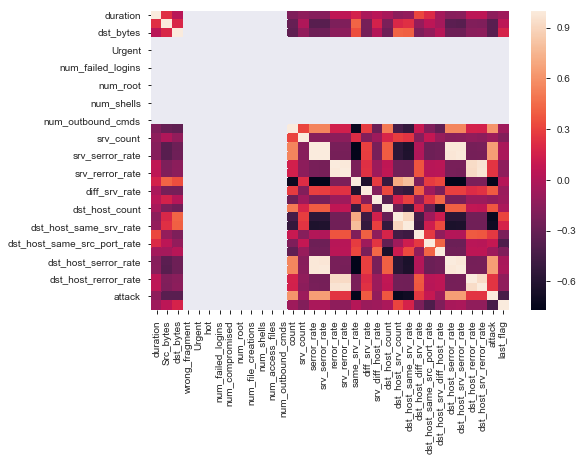

In [22]:
sns.heatmap(numeric_var.corr())

It seems that most of the variable showing NAN value that means they contain more then 99% Zeros. We will remove it later during Feature engineering as they are not valauable.

In [23]:
train_cat=train1[['protocol_type','flag','service']]
train_cat.head(5)

protocol_type flag  service
0           udp   SF    other
1           tcp   S0  private
2           tcp   SF     http
3           tcp   SF     http
4           tcp  REJ  private

In [24]:
# An utility function to create dummy variable for train data
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [25]:
train_cat=train1[['protocol_type','flag','service']]

for c_feature in ['protocol_type','flag','service']:
    train_cat[c_feature] = train_cat[c_feature].astype('category')
    train_cat=create_dummies(train_cat , c_feature)
train_cat

C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


protocol_type_tcp  protocol_type_udp  flag_REJ  flag_RSTO  \
0                       0                  1         0          0   
1                       1                  0         0          0   
2                       1                  0         0          0   
3                       1                  0         0          0   
4                       1                  0         1          0   
5                       1                  0         0          0   
6                       1                  0         0          0   
7                       1                  0         0          0   
8                       1                  0         0          0   
9                       1                  0         1          0   
10                      1                  0         0          0   
11                      1                  0         0          0   
12                      1                  0         0          0   
13                      1                  0         0          0   
14                      1                  0         0          0   
15                      1                  0         0          0   
16                      0                  0         0          0   
17                      1                  0         0          0   
18                      1                  0         0          0   
19                      1                  0         0          0   
20                      1                  0         0          0   
21                      1                  0         0          0   
22                      0                  1         0          0   
23                      1                  0         0          0   
24                      1                  0         0          0   
25                      1                  0         0          0   
26                      1                  0         0          0   
27                      1                  0         0          0   
28                      1                  0         0          0   
29                      0                  0         0          0   
...                   ...                ...       ...        ...   
125942                  1                  0         0          0   
125943                  1                  0         0          0   
125944                  1                  0         0          0   
125945                  1                  0         0          0   
125946                  0                  0         0          0   
125947                  1                  0         0          0   
125948                  1                  0         1          0   
125949                  0                  1         0          0   
125950                  1                  0         0          0   
125951                  1                  0         0          0   
125952                  1                  0         0          0   
125953                  1                  0         0          0   
125954                  1                  0         1          0   
125955                  0                  0         0          0   
125956                  1                  0         0          0   
125957                  1                  0         0          0   
125958                  1                  0         0          0   
125959                  1                  0         0          0   
125960                  1                  0         0          0   
125961                  0                  1         0          0   
125962                  1                  0         0          0   
125963                  1                  0         0          0   
125964                  1                  0         0          0   
125965                  1                  0         0          0   
125966                  1                  0         0          0   
125967                  1                  0         0          0   
125968

In [35]:
#Creating a single dataframe for all Categorical varibles of train data
train_cat_data=pd.concat([train_cat,train1[['land','logged_in','root_shell','su_attempted','is_host_login','is_guest_login']]],axis=1)
train_cat_data

protocol_type_tcp  protocol_type_udp  flag_REJ  flag_RSTO  \
0                       0                  1         0          0   
1                       1                  0         0          0   
2                       1                  0         0          0   
3                       1                  0         0          0   
4                       1                  0         1          0   
5                       1                  0         0          0   
6                       1                  0         0          0   
7                       1                  0         0          0   
8                       1                  0         0          0   
9                       1                  0         1          0   
10                      1                  0         0          0   
11                      1                  0         0          0   
12                      1                  0         0          0   
13                      1                  0         0          0   
14                      1                  0         0          0   
15                      1                  0         0          0   
16                      0                  0         0          0   
17                      1                  0         0          0   
18                      1                  0         0          0   
19                      1                  0         0          0   
20                      1                  0         0          0   
21                      1                  0         0          0   
22                      0                  1         0          0   
23                      1                  0         0          0   
24                      1                  0         0          0   
25                      1                  0         0          0   
26                      1                  0         0          0   
27                      1                  0         0          0   
28                      1                  0         0          0   
29                      0                  0         0          0   
...                   ...                ...       ...        ...   
125942                  1                  0         0          0   
125943                  1                  0         0          0   
125944                  1                  0         0          0   
125945                  1                  0         0          0   
125946                  0                  0         0          0   
125947                  1                  0         0          0   
125948                  1                  0         1          0   
125949                  0                  1         0          0   
125950                  1                  0         0          0   
125951                  1                  0         0          0   
125952                  1                  0         0          0   
125953                  1                  0         0          0   
125954                  1                  0         1          0   
125955                  0                  0         0          0   
125956                  1                  0         0          0   
125957                  1                  0         0          0   
125958                  1                  0         0          0   
125959                  1                  0         0          0   
125960                  1                  0         0          0   
125961                  0                  1         0          0   
125962                  1                  0         0          0   
125963                  1                  0         0          0   
125964                  1                  0         0          0   
125965                  1                  0         0          0   
125966                  1                  0         0          0   
125967                  1                  0         0          0   
125968

In [36]:
#Combining numeric and categorical variables and create a single dataframe for training data
train_set= pd.concat([numeric_var,train_cat_data], axis=1)
train_set

duration  Src_bytes  dst_bytes  wrong_fragment  Urgent  hot  \
0            0.0      146.0        0.0             0.0     0.0  0.0   
1            0.0        0.0        0.0             0.0     0.0  0.0   
2            0.0      232.0     8153.0             0.0     0.0  0.0   
3            0.0      199.0      420.0             0.0     0.0  0.0   
4            0.0        0.0        0.0             0.0     0.0  0.0   
5            0.0        0.0        0.0             0.0     0.0  0.0   
6            0.0        0.0        0.0             0.0     0.0  0.0   
7            0.0        0.0        0.0             0.0     0.0  0.0   
8            0.0        0.0        0.0             0.0     0.0  0.0   
9            0.0        0.0        0.0             0.0     0.0  0.0   
10           0.0        0.0        0.0             0.0     0.0  0.0   
11           0.0      287.0     2251.0             0.0     0.0  0.0   
12           0.0      334.0        0.0             0.0     0.0  0.0   
13           0.0        0.0        0.0             0.0     0.0  0.0   
14           0.0        0.0        0.0             0.0     0.0  0.0   
15           0.0      300.0     8314.0             0.0     0.0  0.0   
16           0.0       18.0        0.0             0.0     0.0  0.0   
17           0.0      233.0      616.0             0.0     0.0  0.0   
18           0.0      343.0     1178.0             0.0     0.0  0.0   
19           0.0        0.0        0.0             0.0     0.0  0.0   
20           0.0        0.0        0.0             0.0     0.0  0.0   
21           0.0      253.0     8314.0             0.0     0.0  0.0   
22           4.0      147.0      105.0             0.0     0.0  0.0   
23           0.0        0.0        0.0             0.0     0.0  0.0   
24           4.0      437.0     8314.0             0.0     0.0  0.0   
25           0.0        0.0        0.0             0.0     0.0  0.0   
26           0.0      227.0     6588.0             0.0     0.0  0.0   
27           0.0      215.0     8314.0             0.0     0.0  0.0   
28           0.0      241.0     1400.0             0.0     0.0  0.0   
29           0.0        8.0        0.0             0.0     0.0  0.0   
...          ...        ...        ...             ...     ...  ...   
125942       0.0      491.0        0.0             0.0     0.0  0.0   
125943       1.0     1480.0      362.0             0.0     0.0  0.0   
125944       0.0      247.0      799.0             0.0     0.0  0.0   
125945       0.0        0.0        0.0             0.0     0.0  0.0   
125946       0.0       18.0        0.0             0.0     0.0  0.0   
125947       0.0        0.0        0.0             0.0     0.0  0.0   
125948       0.0        0.0        0.0             0.0     0.0  0.0   
125949       0.0       28.0        0.0             0.0     0.0  0.0   
125950       0.0      254.0      555.0             0.0     0.0  0.0   
125951       0.0     1289.0      408.0             0.0     0.0  0.0   
125952       0.0        0.0        0.0             0.0     0.0  0.0   
125953       0.0      269.0     8314.0             0.0     0.0  0.0   
125954       0.0        0.0        0.0             0.0     0.0  0.0   
125955       0.0       30.0        0.0             0.0     0.0  0.0   
125956       1.0     1247.0      327.0             0.0     0.0  0.0   
125957       0.0        0.0        0.0             0.0     0.0  0.0   
125958       0.0      373.0     4777.0             0.0     0.0  0.0   
125959       0.0      329.0      885.0             0.0     0.0  0.0   
125960       0.0      236.0     2698.0             0.0     0.0  0.0   
125961       0.0       33.0        0.0             0.0     0.0  0.0   
125962       0.0      334.0     1600.0             0.0     0.0  0.0   
125963       0.0        0.0        0.0             0.0     0.0  0.0   
125964       0.0     1480.0      365.0             0.0     0.0  0.0   
125965       0.0        0.0        0.0             0.0     0.0  0.0   
125966       0.0      359.0     

# Feature Selection

Dropping Columns based on:

    -Based on low variance (near zero variance)
    - High missings (>25% missings)
    - High correlations between two numerical variables

In [28]:
#num_outbound_cmds is redundant feature contains 100% 0 value so removing it
train_set.drop(['num_outbound_cmds'], axis=1, inplace= True)
train_set.drop(['num_file_creations','num_failed_logins','num_compromised','num_access_files','hot'], axis=1, inplace= True)
train_set.drop(['rerror_rate','serror_rate'], axis=1, inplace= True)
train_set.drop(['dst_host_srv_rerror_rate','dst_host_srv_serror_rate'], axis=1, inplace= True)

In [62]:
train_set.drop(['num_root','num_shells','Urgent'], axis=1, inplace= True)

# Variable reduction using WOE or log(odds)

Identify important variables using WOE or log(odds) comparing with attack Variable Transformation: (i) Bucketing if the variables are not having linear relationship with log(odds)

C:\Users\Aanchal\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


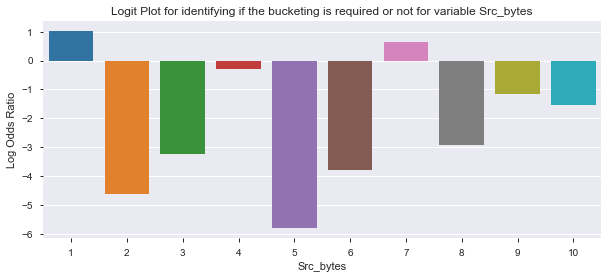

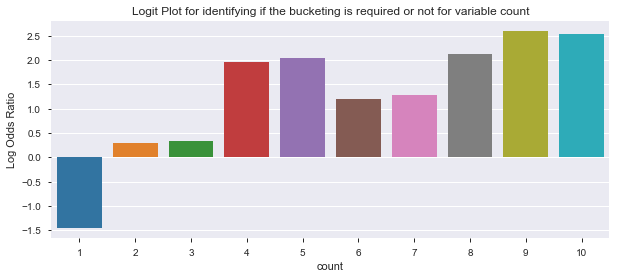

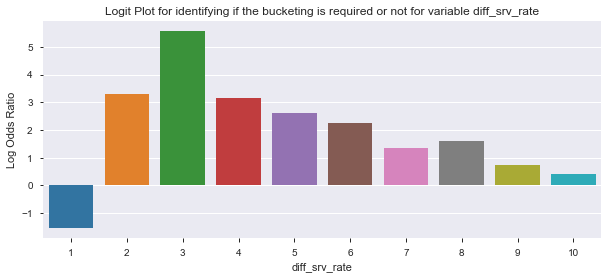

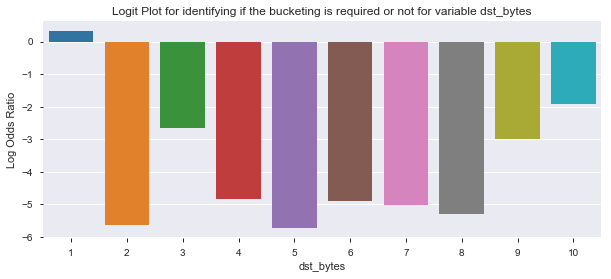

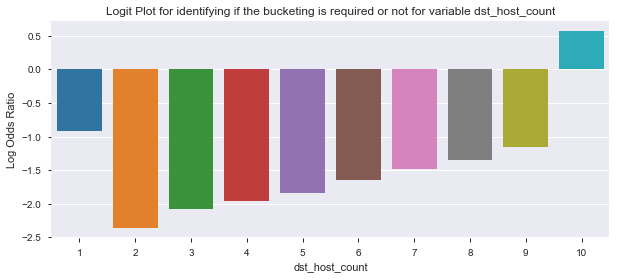

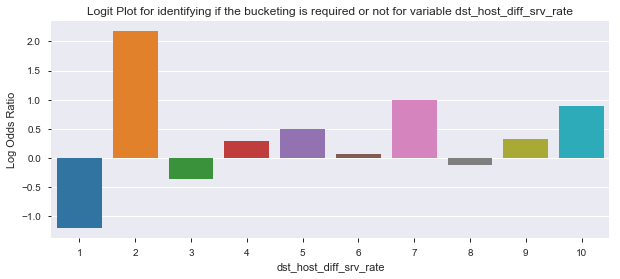

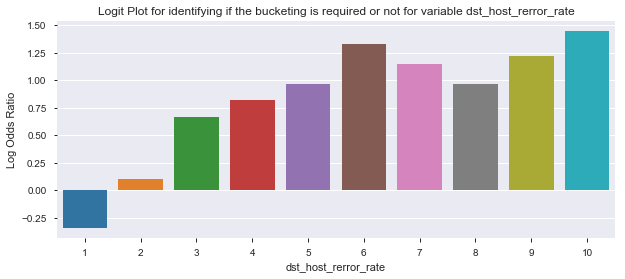

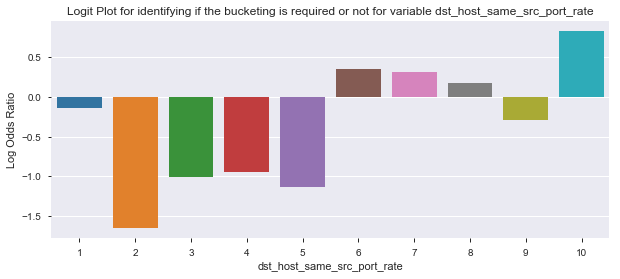

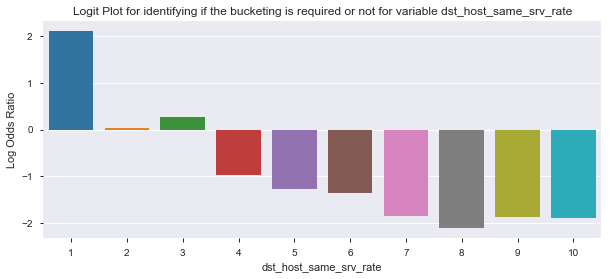

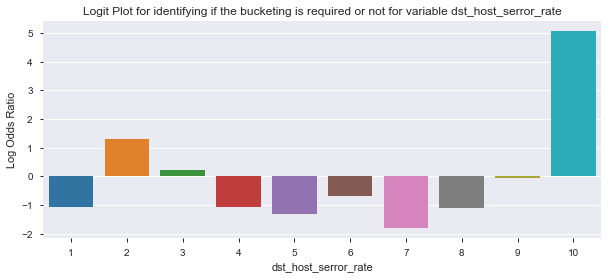

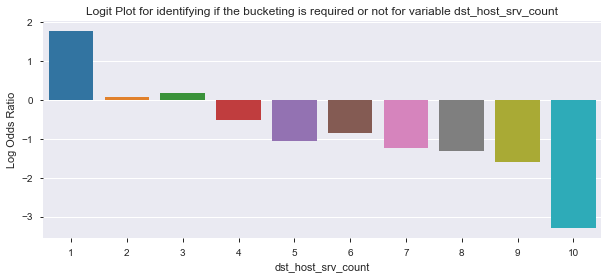

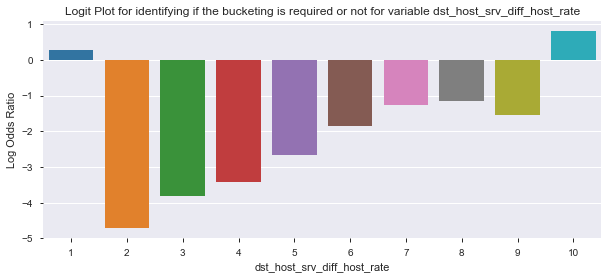

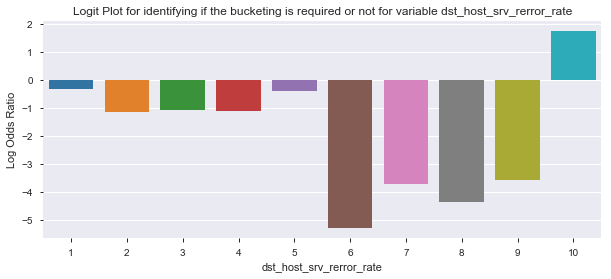

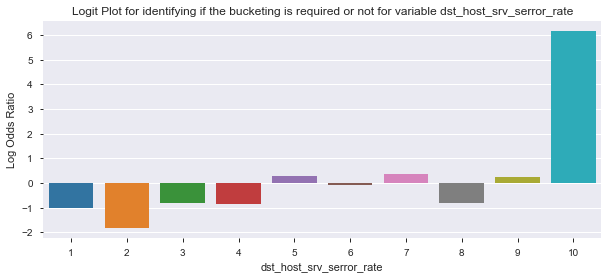

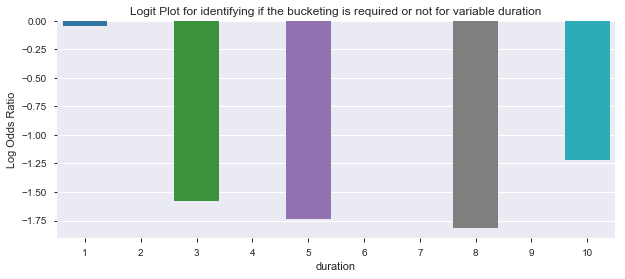

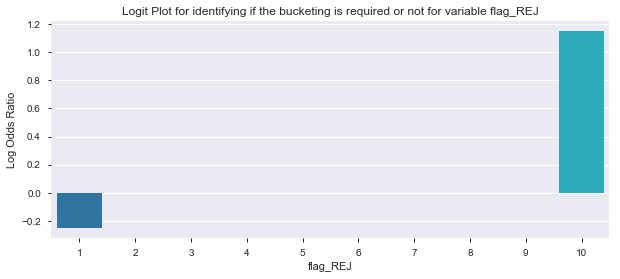

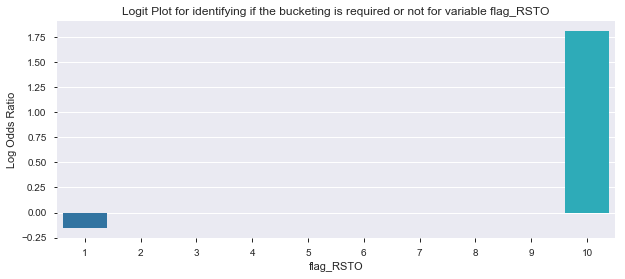

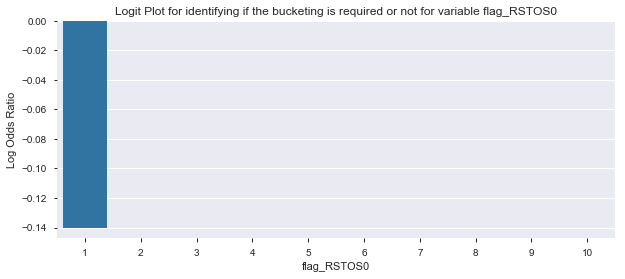

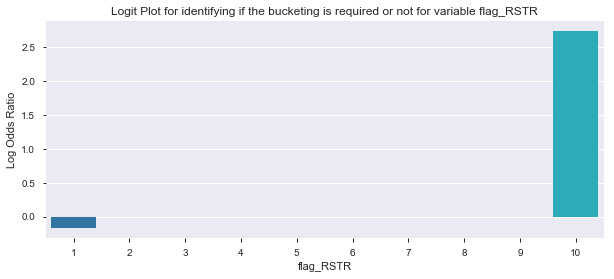

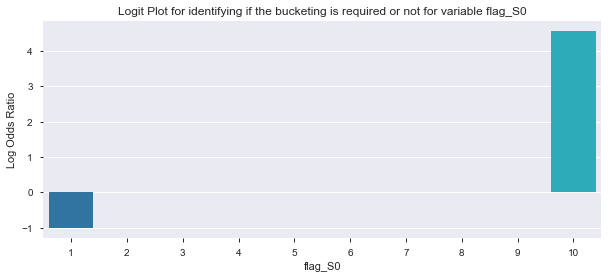

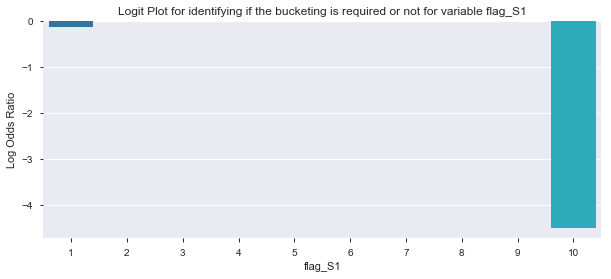

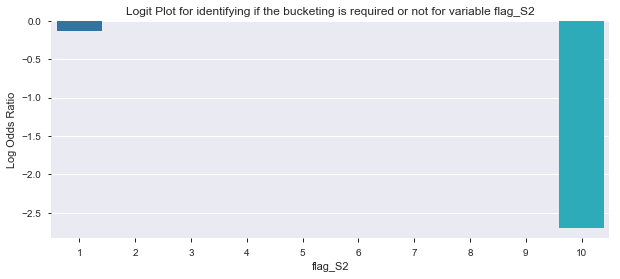

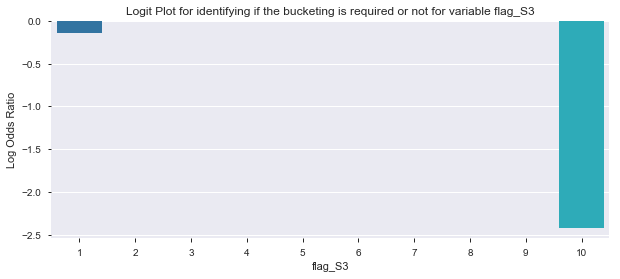

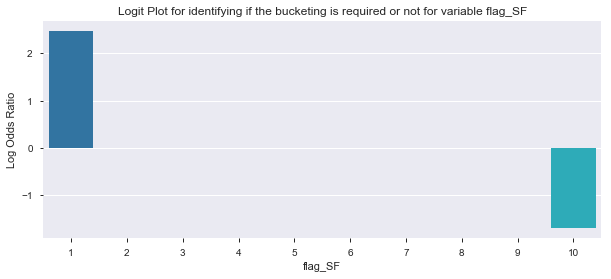

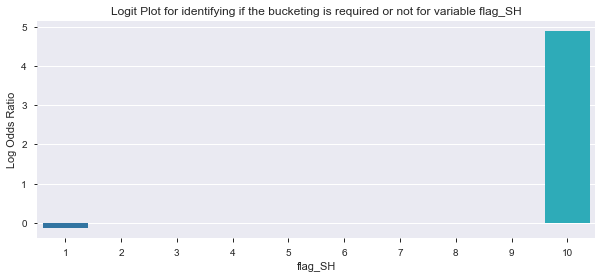

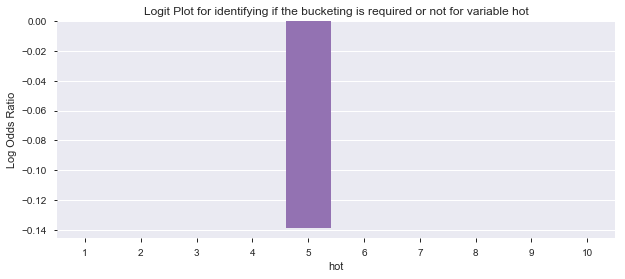

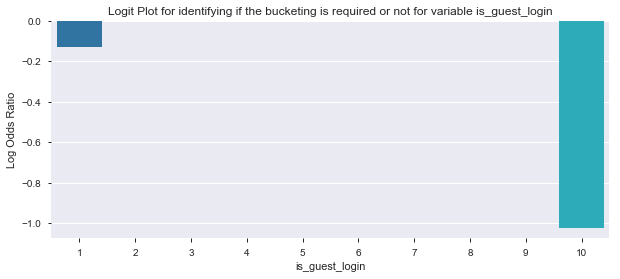

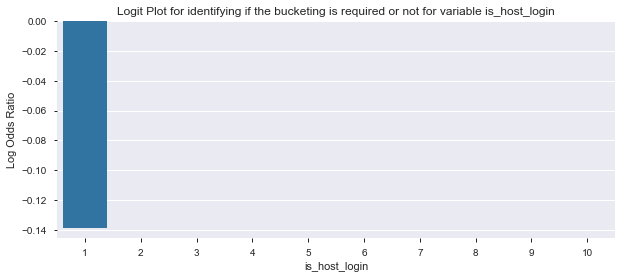

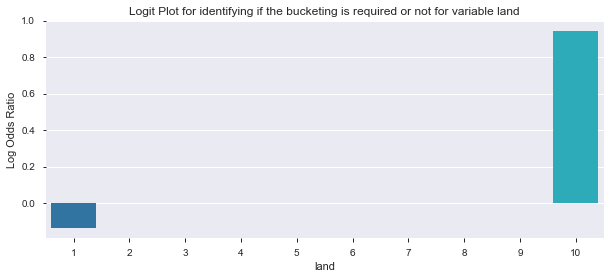

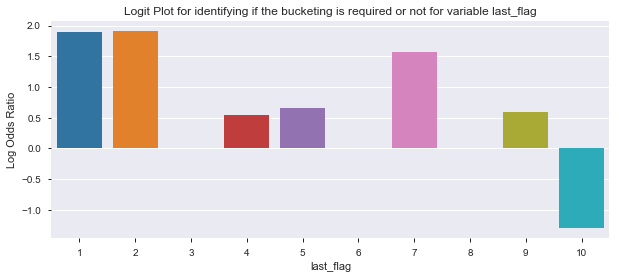

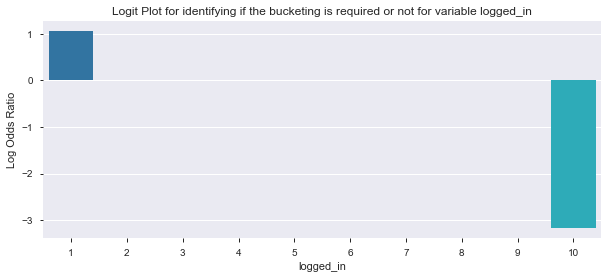

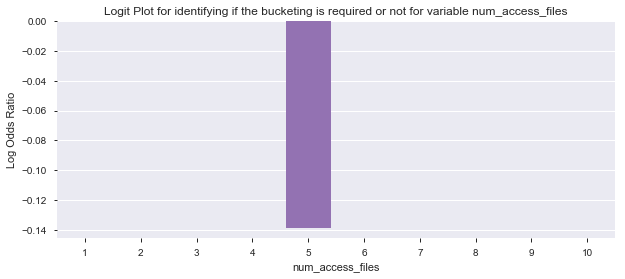

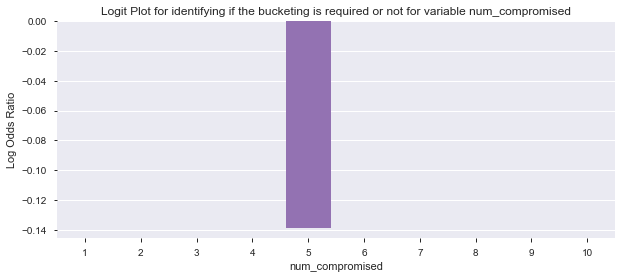

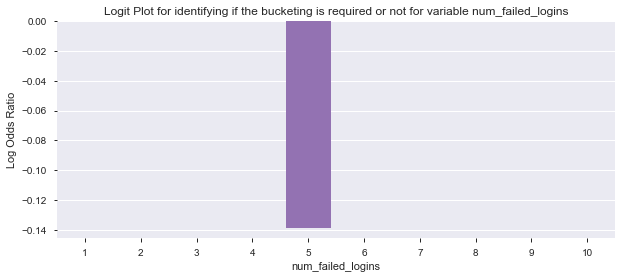

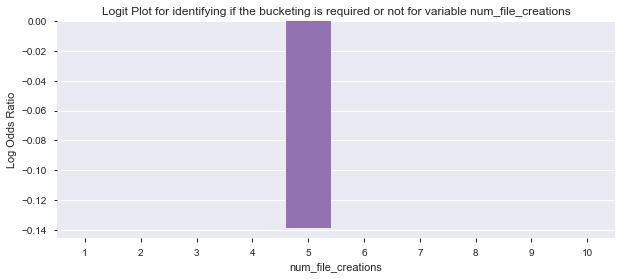

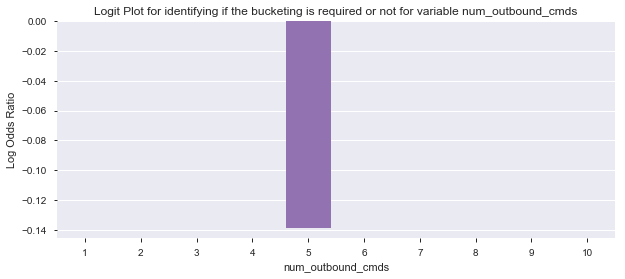

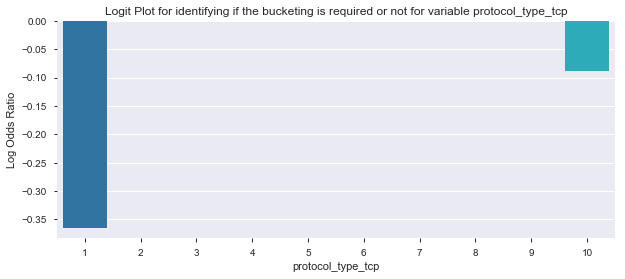

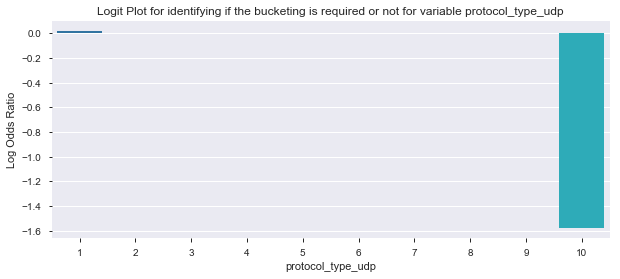

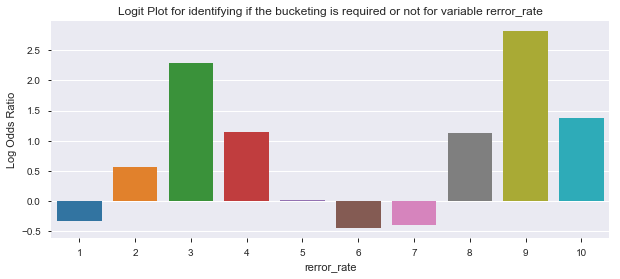

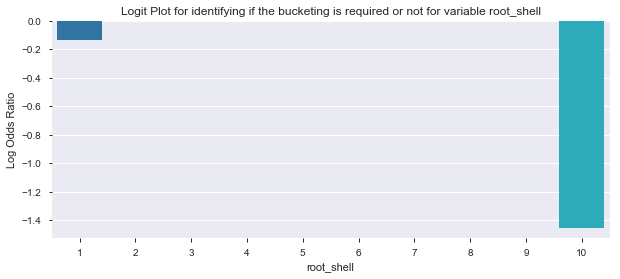

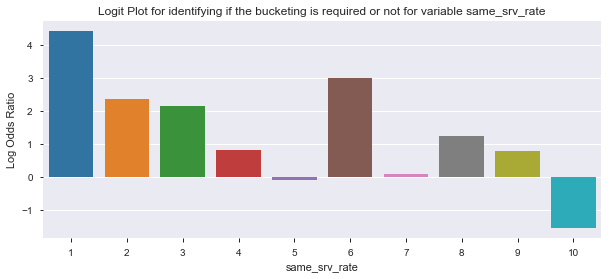

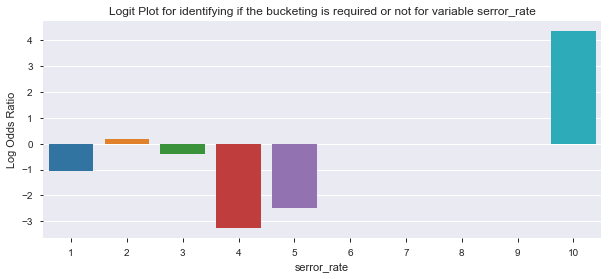

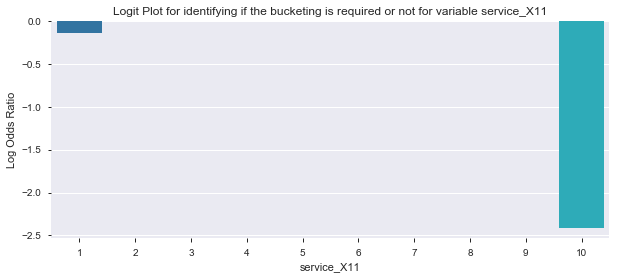

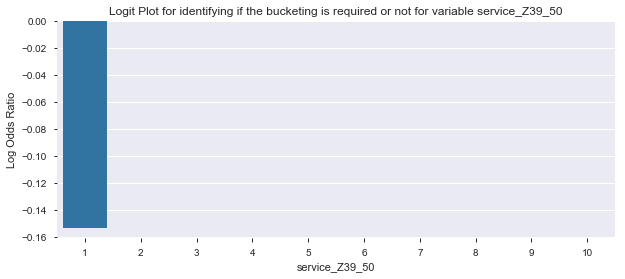

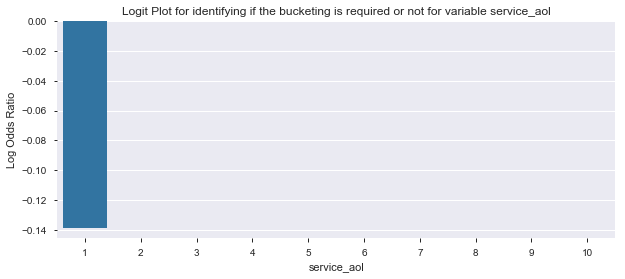

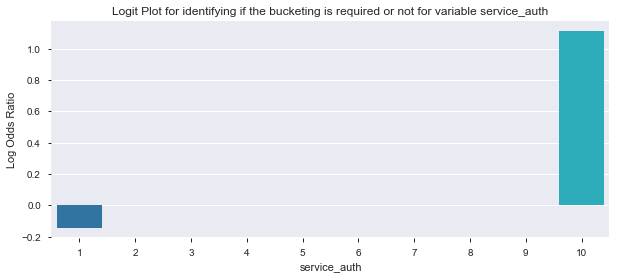

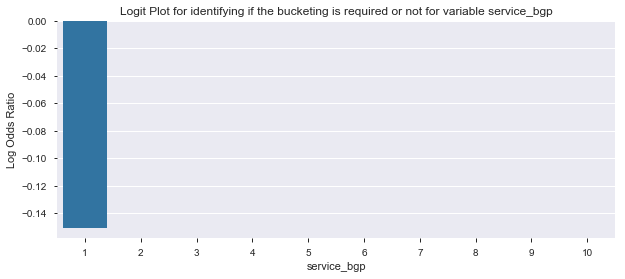

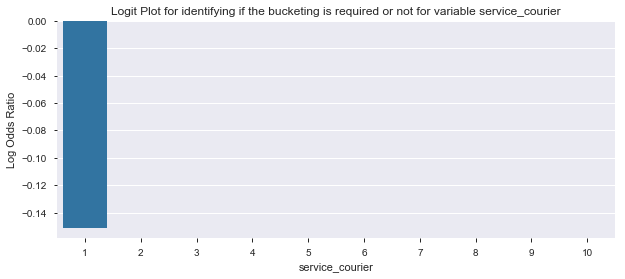

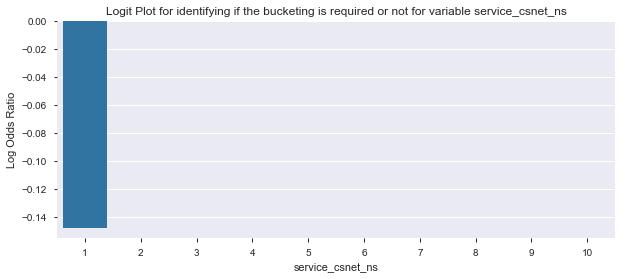

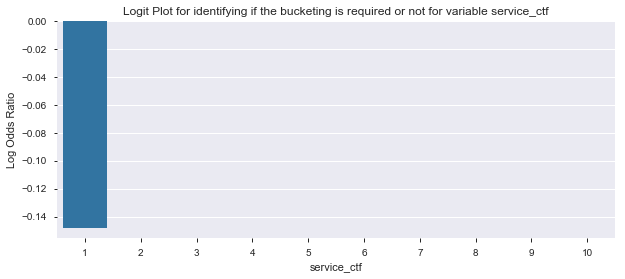

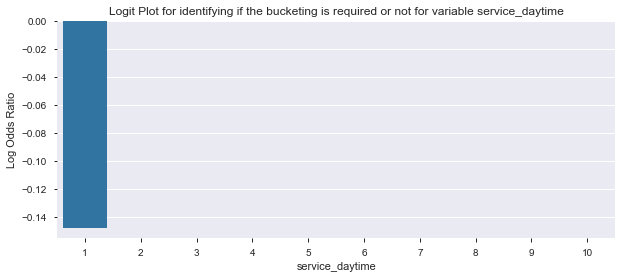

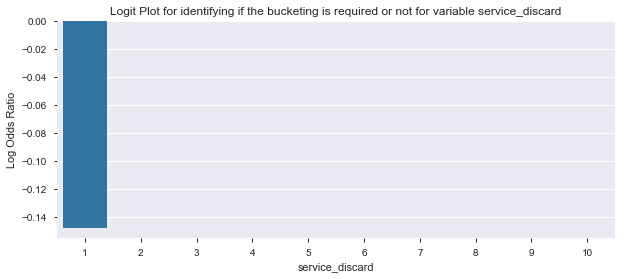

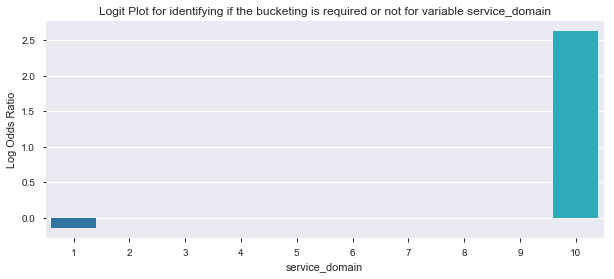

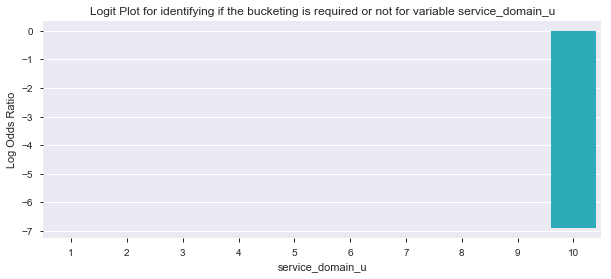

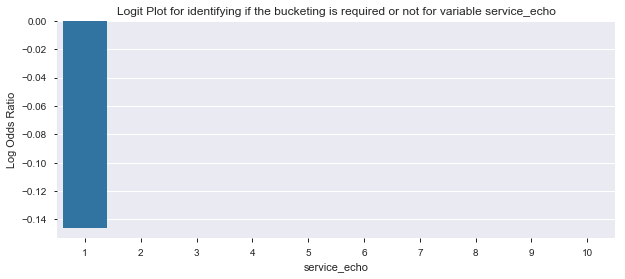

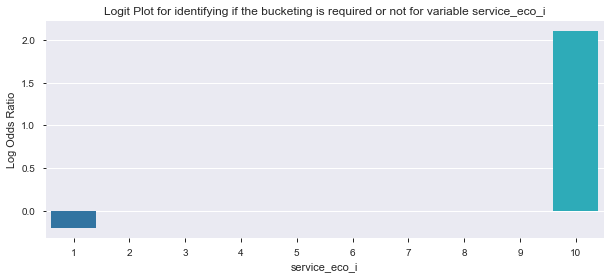

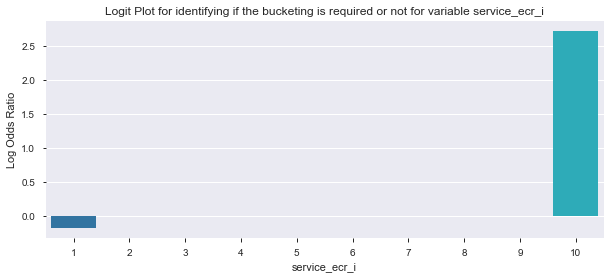

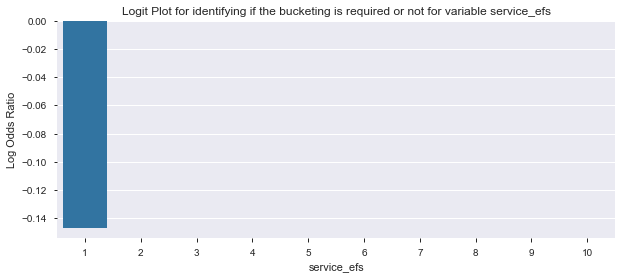

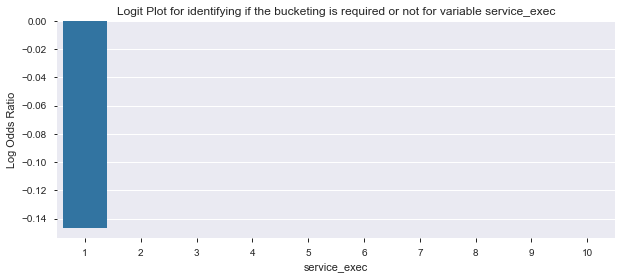

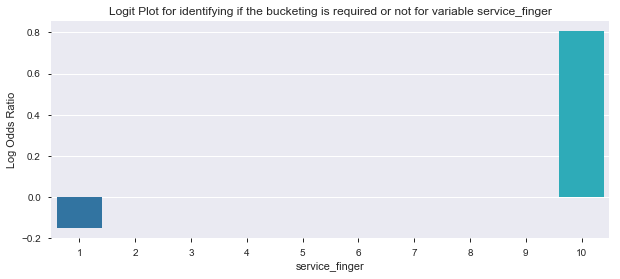

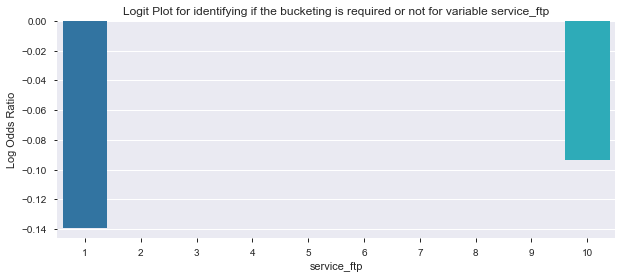

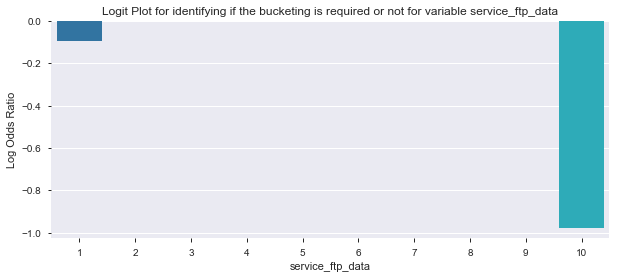

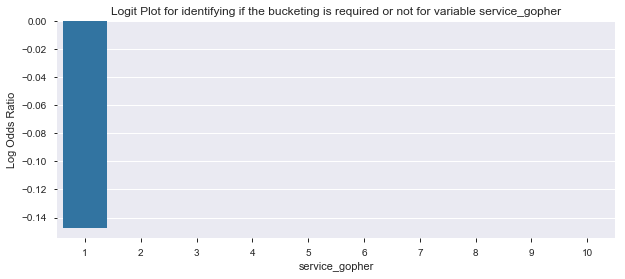

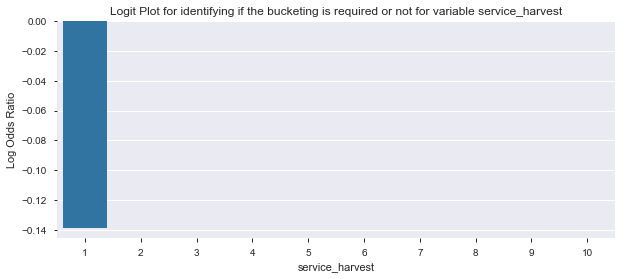

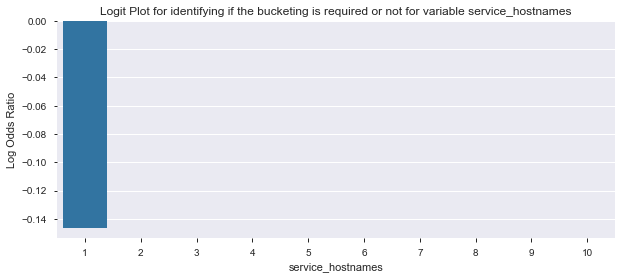

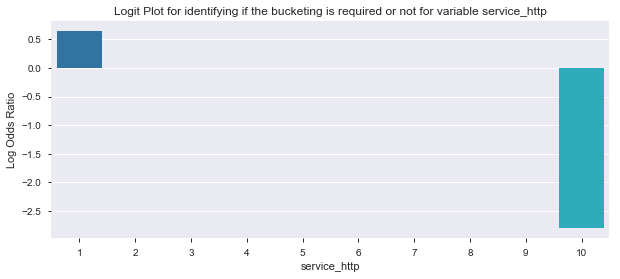

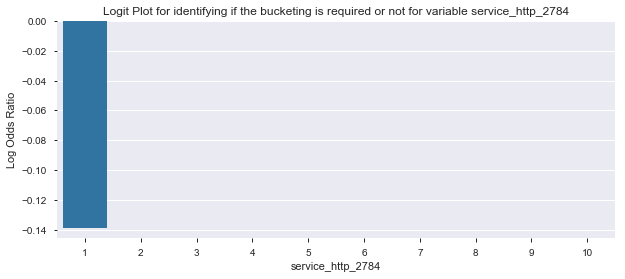

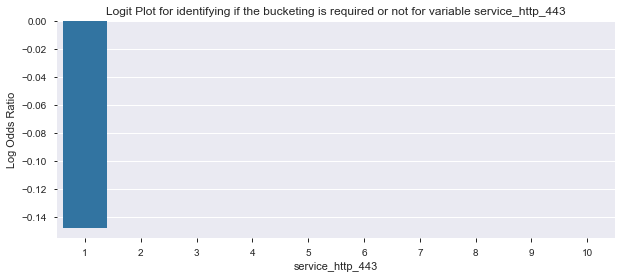

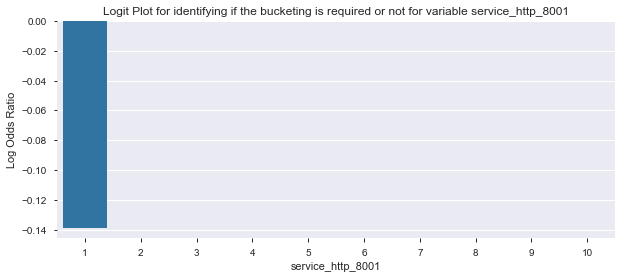

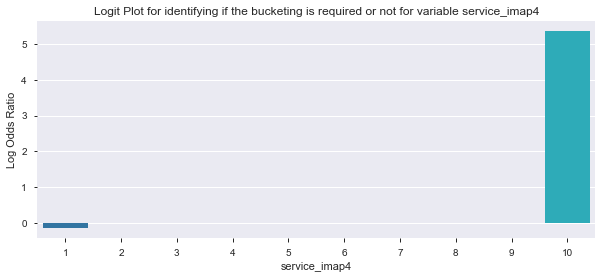

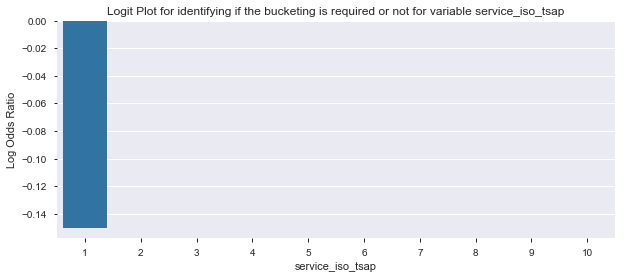

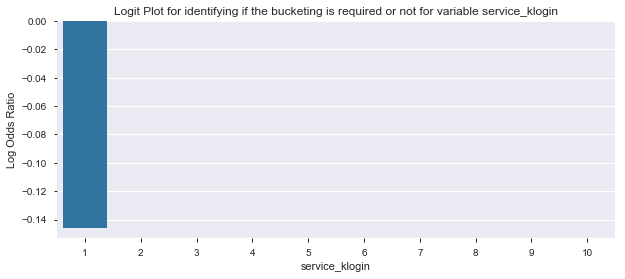

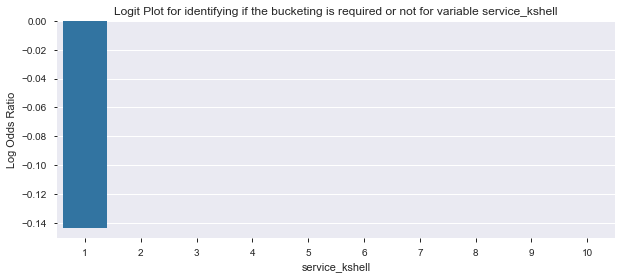

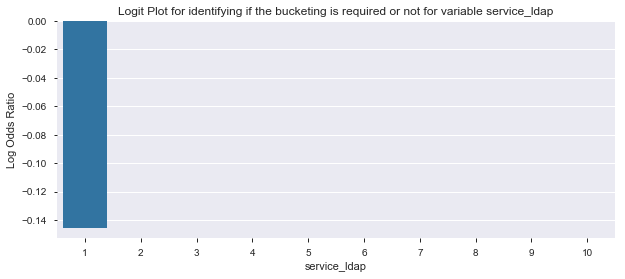

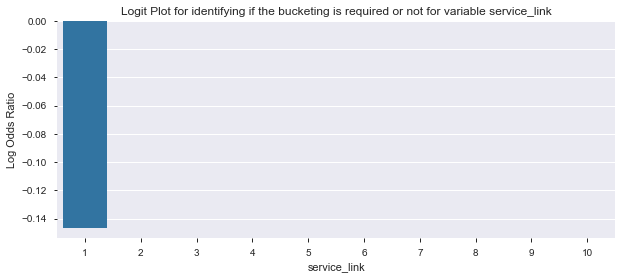

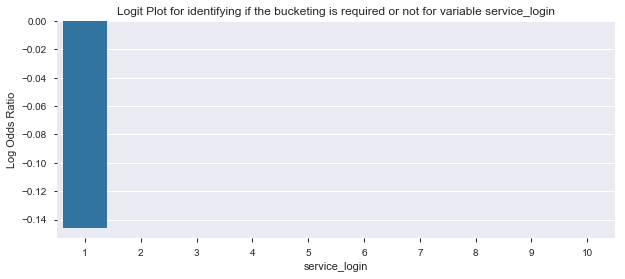

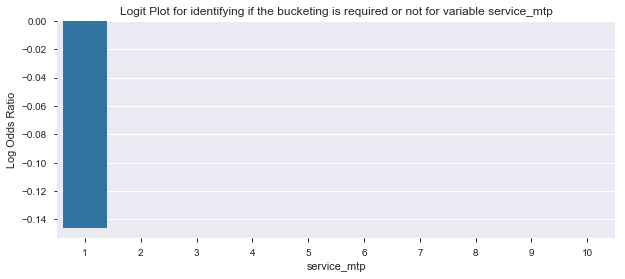

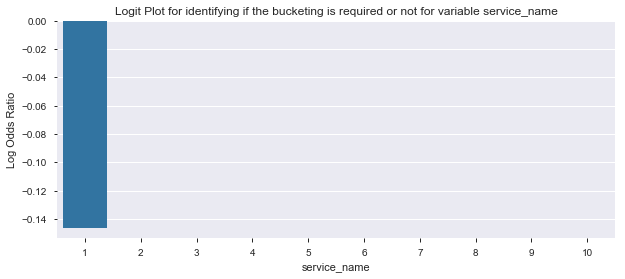

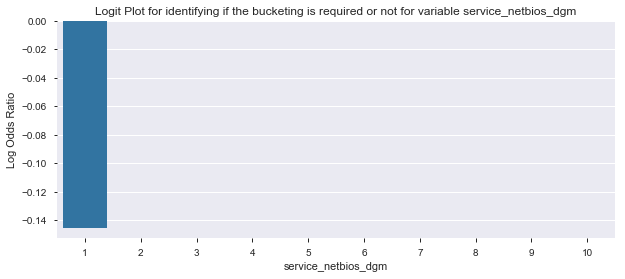

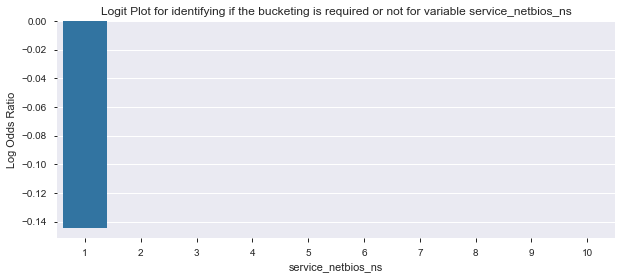

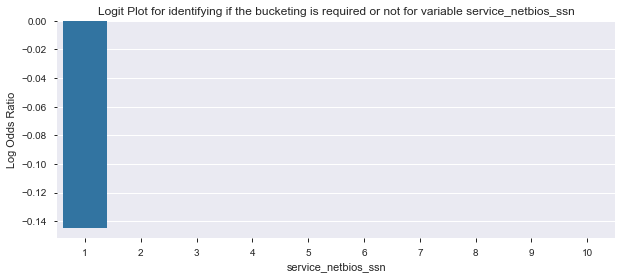

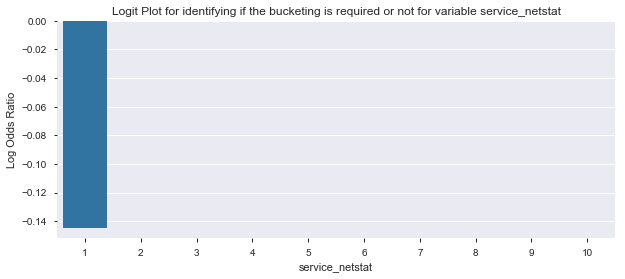

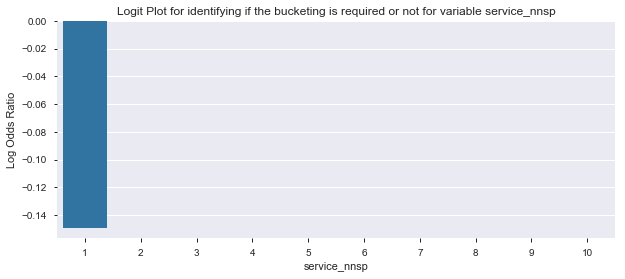

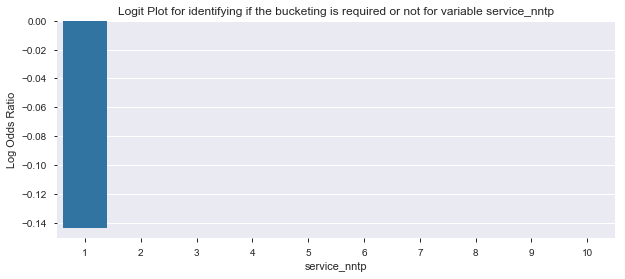

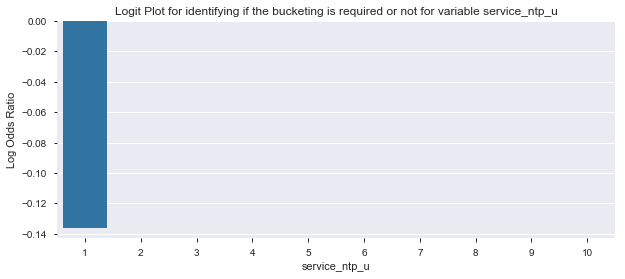

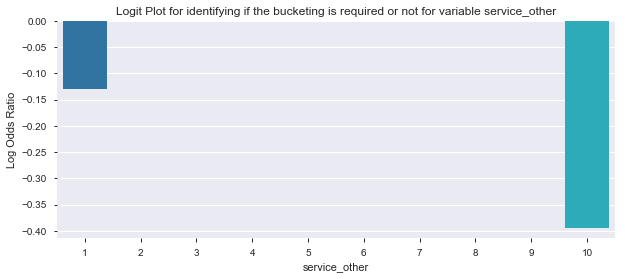

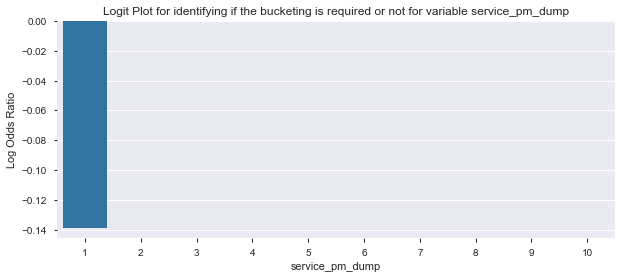

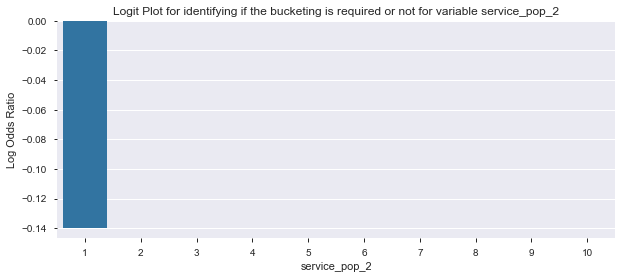

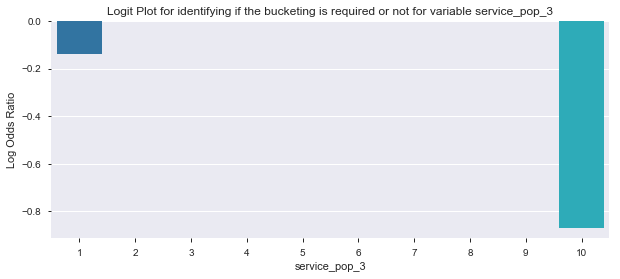

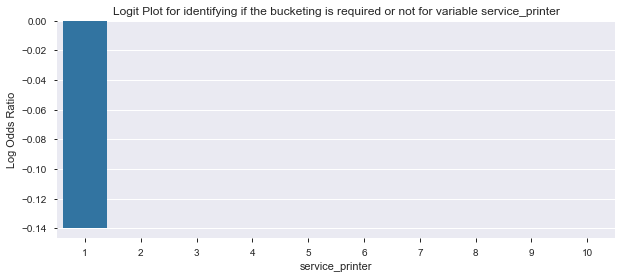

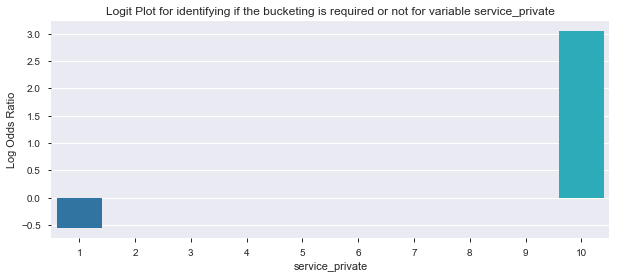

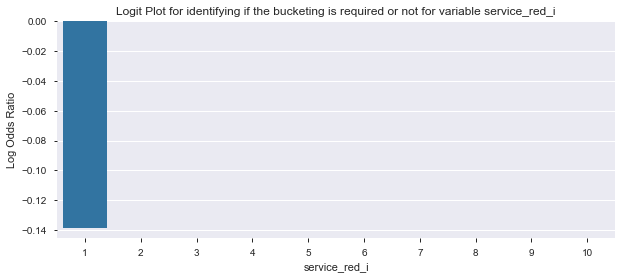

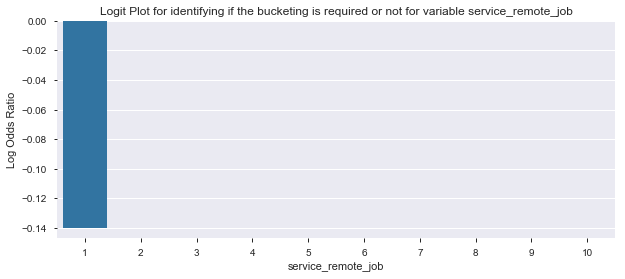

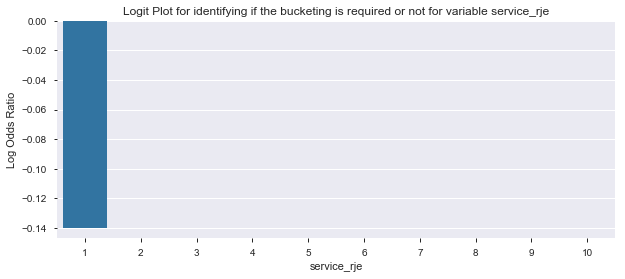

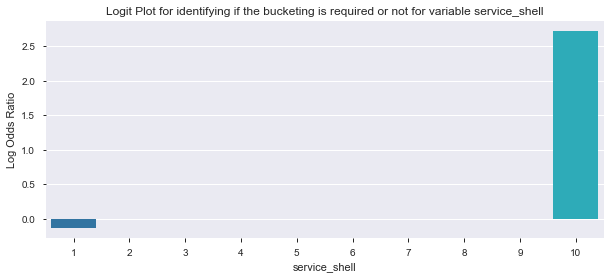

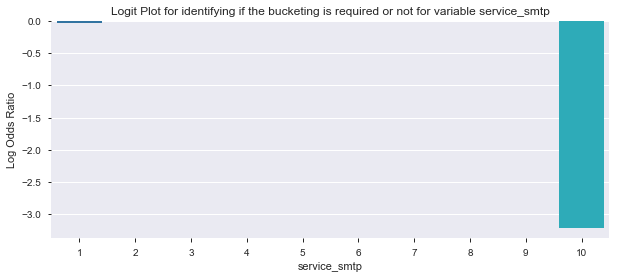

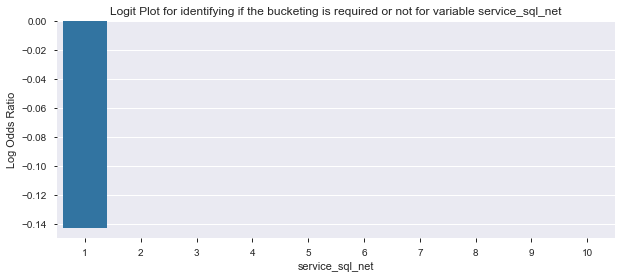

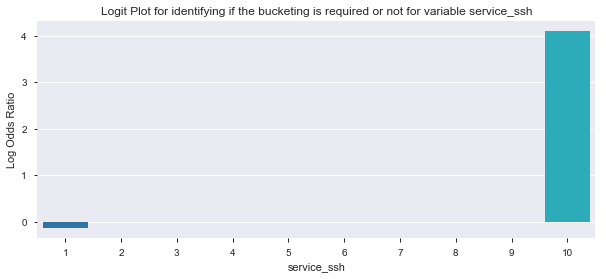

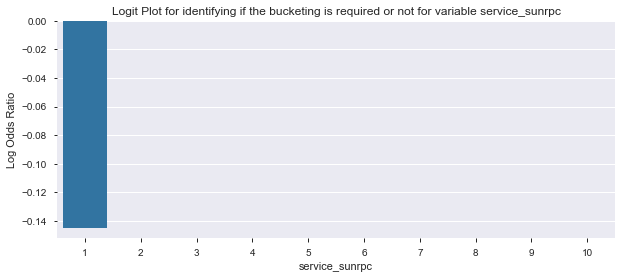

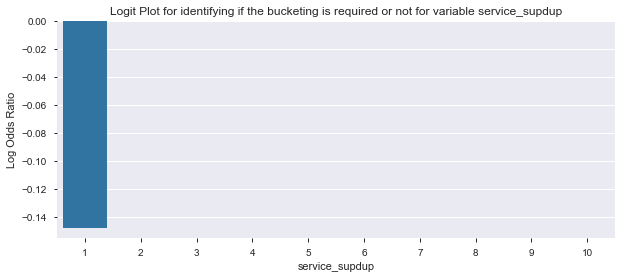

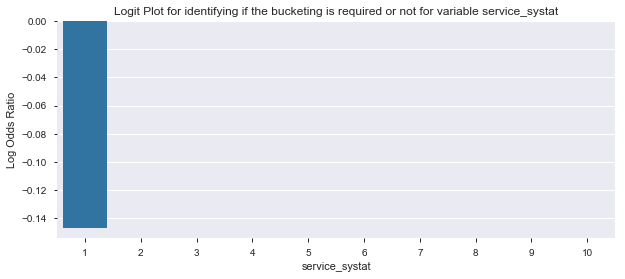

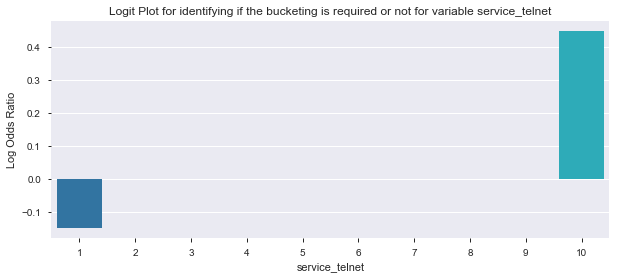

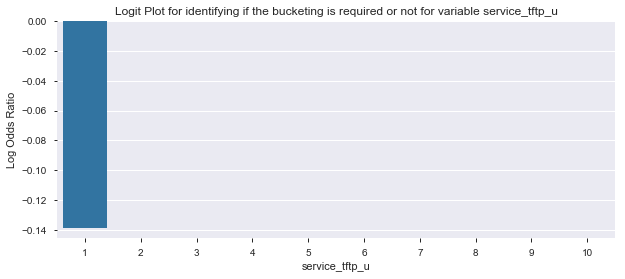

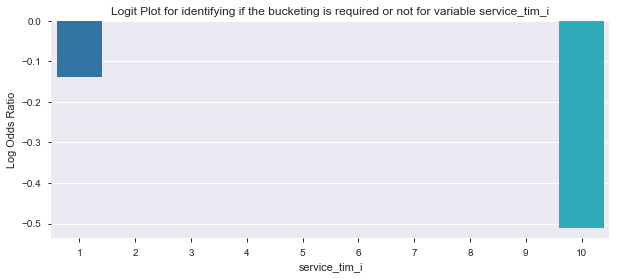

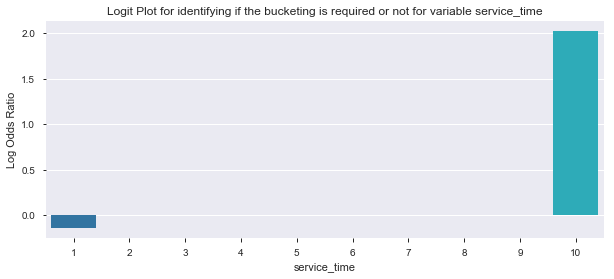

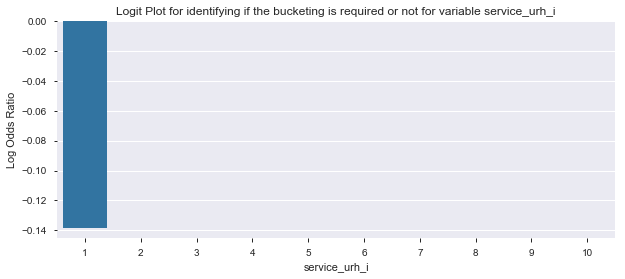

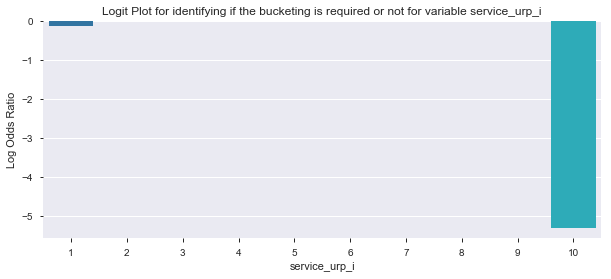

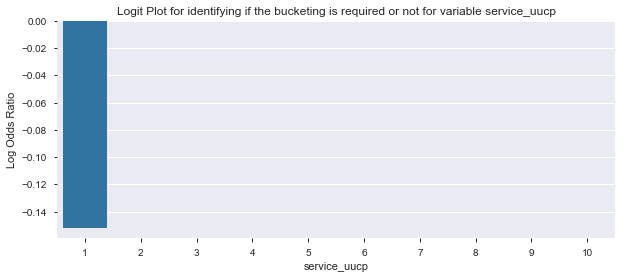

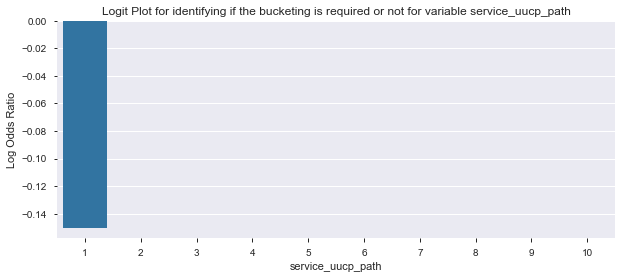

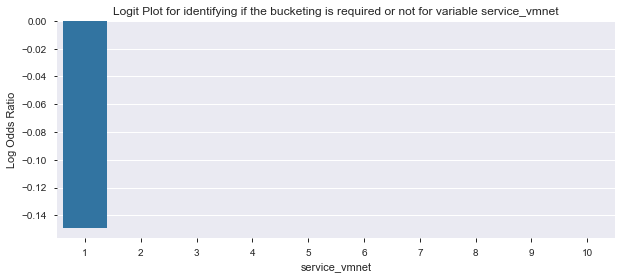

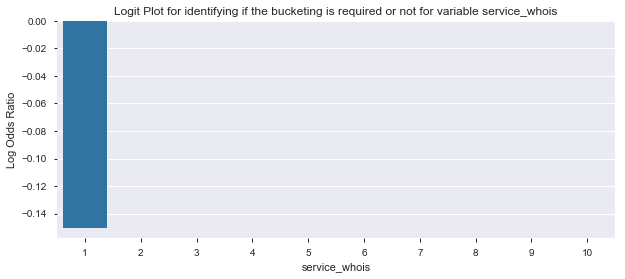

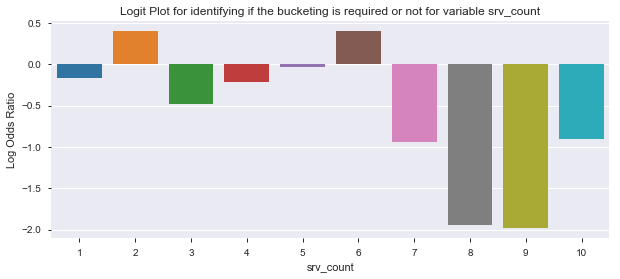

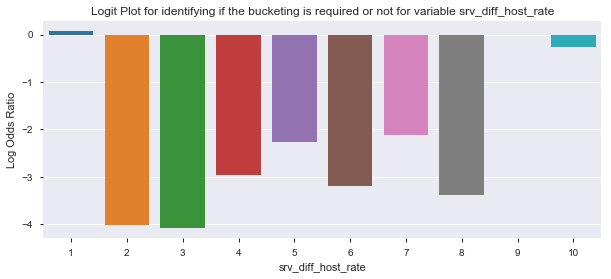

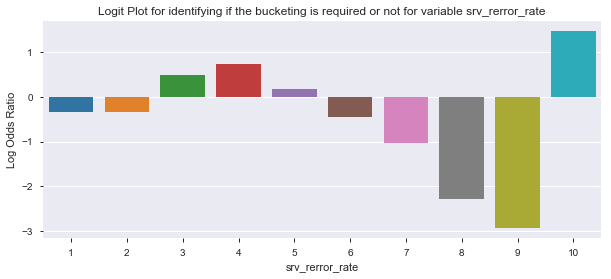

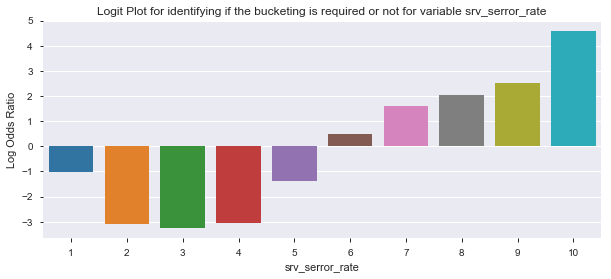

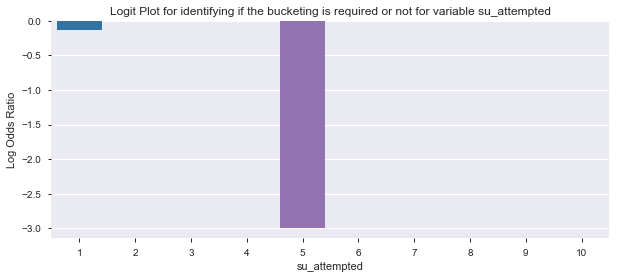

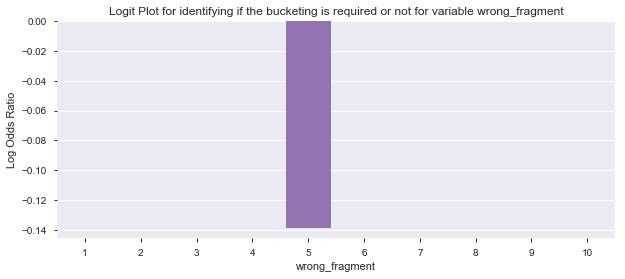

In [63]:
bp = PdfPages('WOE Plots.pdf')

for num_variable in train_set.columns.difference(['attack']):
    binned = pd.cut(train_set[num_variable], bins=10, labels=list(range(1,11)))
    #binned = binned.dropna()
    odds = train_set.groupby(binned)['attack'].sum() / (train_set.groupby(binned)['attack'].count()-train_set.groupby(binned)['attack'].sum())
    log_odds = np.log(odds)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=log_odds.index,y=log_odds)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(num_variable))
    bp.savefig(fig)

bp.close()

# WOE & IV

In [64]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 

In [65]:
final_iv, IV = data_vars(train_set,train_set.attack)

C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:94: RuntimeWarning: divide by zero encountered in log
C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:95: RuntimeWarning: divide by zero encountered in log


In [66]:
final_iv

VAR_NAME  MIN_VALUE  MAX_VALUE   COUNT    EVENT  EVENT_RATE  \
0              duration       0.00       1.00  117943  56910.0    0.482521   
1              duration       2.00       4.00    8029   1720.0    0.214223   
2             Src_bytes       0.00      44.00   64335  53567.0    0.832626   
3             Src_bytes      45.00    1480.00   61637   5063.0    0.082142   
4             dst_bytes       0.00       1.00   67988  57024.0    0.838736   
5             dst_bytes       3.00    8314.00   57984   1606.0    0.027697   
6        wrong_fragment       0.00       0.00  125972  58630.0    0.465421   
7                   hot       0.00       0.00  125972  58630.0    0.465421   
8     num_failed_logins       0.00       0.00  125972  58630.0    0.465421   
9       num_compromised       0.00       0.00  125972  58630.0    0.465421   
10   num_file_creations       0.00       0.00  125972  58630.0    0.465421   
11     num_access_files       0.00       0.00  125972  58630.0    0.465421   
12    num_outbound_cmds       0.00       0.00  125972  58630.0    0.465421   
13                count       1.00       4.00   44761  10064.0    0.224839   
14                count       5.00     107.00   39273  11398.0    0.290225   
15                count     108.00     286.00   41938  37168.0    0.886261   
16            srv_count       1.00       8.00   66573  27041.0    0.406186   
17            srv_count       9.00     158.00   59399  31589.0    0.531810   
18          serror_rate       0.00       1.00  125972  58630.0    0.465421   
19      srv_serror_rate       0.00       1.00  125972  58630.0    0.465421   
20          rerror_rate       0.00       1.00  125972  58630.0    0.465421   
21      srv_rerror_rate       0.00       1.00  125972  58630.0    0.465421   
22        same_srv_rate       0.01       1.00  125972  58630.0    0.465421   
23        diff_srv_rate       0.00       0.29  125972  58630.0    0.465421   
24        diff_srv_rate        NaN        NaN       0      0.0         NaN   
25   srv_diff_host_rate       0.00       1.00  125972  58630.0    0.465421   
26       dst_host_count        NaN        NaN       0      0.0         NaN   
27       dst_host_count       3.00     255.00  125972  58630.0    0.465421   
28   dst_host_srv_count       1.00      16.00   42517  36058.0    0.848084   
29   dst_host_srv_count      17.00     238.00   41559  21159.0    0.509132   
..                  ...        ...        ...     ...      ...         ...   
189      service_tftp_u       1.00       1.00       3      0.0    0.000000   
190       service_tim_i       0.00       0.00  125964  58627.0    0.465427   
191       service_tim_i       1.00       1.00       8      3.0    0.375000   
192        service_time       0.00       0.00  125318  58052.0    0.463238   
193        service_time       1.00       1.00     654    578.0    0.883792   
194       service_urh_i       0.00       0.00  125962  58630.0    0.465458   
195       service_urh_i       1.00       1.00      10      0.0    0.000000   
196       service_urp_i       0.00       0.00  125370  58627.0    0.467632   
197       service_urp_i       1.00       1.00     602      3.0    0.004983   
198        service_uucp       0.00       0.00  125192  57850.0    0.462090   
199        service_uucp       1.00       1.00     780    780.0    1.000000   
200   service_uucp_path       0.00       0.00  125283  57941.0    0.462481   
201   service_uucp_path       1.00       1.00     689    689.0    1.000000   
202       service_vmnet       0.00       0.00  125355  58013.0    0.462790   
203       service_vmnet       1.00       1.00     617    617.0    1.000000   
204       service_whois       0.00       0.00  125279  57937.0    0.462464   
205       service_whois       1.00       1.00     693    693.0    1.000000   
206                land       0.00       0.00  125947  58612.0    0.465370   
207                land       1.00       1.00      25     18.0    0.720000   
208           logged_in       0.00   

In [67]:
IV_VAL=IV.sort_values('IV')
IV_VAL.sort_values(by=['IV'])
IV_values= IV_VAL.sort_values(by='IV', ascending=False)
IV_values

VAR_NAME            IV
3                      dst_bytes  4.216766e+00
19                       flag_S0  3.265671e+00
23                       flag_SF  3.111648e+00
0                      Src_bytes  3.028504e+00
30                     logged_in  2.871990e+00
10            dst_host_srv_count  2.830899e+00
8         dst_host_same_srv_rate  2.182342e+00
65                  service_http  1.822399e+00
1                          count  1.777690e+00
5         dst_host_diff_srv_rate  1.753135e+00
90               service_private  1.235988e+00
29                     last_flag  1.109676e+00
53              service_domain_u  9.268449e-01
95                  service_smtp  3.160861e-01
37             protocol_type_udp  2.258395e-01
15                      flag_REJ  1.489152e-01
55                 service_eco_i  1.441122e-01
56                 service_ecr_i  1.349490e-01
18                     flag_RSTR  1.070490e-01
14                      duration  7.913111e-02
111                    srv_count  6.381154e-02
69                 service_imap4  6.037148e-02
106                service_urp_i  4.569549e-02
16                     flag_RSTO  3.875913e-02
61              service_ftp_data  3.707212e-02
52                service_domain  2.364525e-02
20                       flag_S1  2.312468e-02
24                       flag_SH  2.299561e-02
97                   service_ssh  2.190628e-02
104                 service_time  1.899755e-02
..                           ...           ...
105                service_urh_i  2.205262e-08
91                 service_red_i  1.411347e-08
86               service_pm_dump  7.273086e-09
102               service_tftp_u  1.984633e-09
68             service_http_8001  1.163664e-09
44                   service_aol  1.163664e-09
63               service_harvest  1.163664e-09
66             service_http_2784  2.909135e-10
27                 is_host_login  2.205115e-10
38                   rerror_rate  0.000000e+00
41                   serror_rate  0.000000e+00
13      dst_host_srv_serror_rate  0.000000e+00
40                 same_srv_rate  0.000000e+00
25                           hot  0.000000e+00
34            num_file_creations  0.000000e+00
31              num_access_files  0.000000e+00
32               num_compromised  0.000000e+00
33             num_failed_logins  0.000000e+00
12      dst_host_srv_rerror_rate  0.000000e+00
35             num_outbound_cmds  0.000000e+00
2                  diff_srv_rate  0.000000e+00
9           dst_host_serror_rate  0.000000e+00
114              srv_serror_rate  0.000000e+00
4                 dst_host_count  0.000000e+00
112           srv_diff_host_rate  0.000000e+00
6           dst_host_rerror_rate  0.000000e+00
113              srv_rerror_rate  0.000000e+00
11   dst_host_srv_diff_host_rate  0.000000e+00
7    dst_host_same_src_port_rate  0.000000e+00
116               wrong_fragment  0.000000e+00

[117 rows x 2 columns]

In [68]:
IV_values[IV_values['IV']>0.02]

VAR_NAME        IV
3                 dst_bytes  4.216766
19                  flag_S0  3.265671
23                  flag_SF  3.111648
0                 Src_bytes  3.028504
30                logged_in  2.871990
10       dst_host_srv_count  2.830899
8    dst_host_same_srv_rate  2.182342
65             service_http  1.822399
1                     count  1.777690
5    dst_host_diff_srv_rate  1.753135
90          service_private  1.235988
29                last_flag  1.109676
53         service_domain_u  0.926845
95             service_smtp  0.316086
37        protocol_type_udp  0.225839
15                 flag_REJ  0.148915
55            service_eco_i  0.144112
56            service_ecr_i  0.134949
18                flag_RSTR  0.107049
14                 duration  0.079131
111               srv_count  0.063812
69            service_imap4  0.060371
106           service_urp_i  0.045695
16                flag_RSTO  0.038759
61         service_ftp_data  0.037072
52           service_domain  0.023645
20                  flag_S1  0.023125
24                  flag_SH  0.022996
97              service_ssh  0.021906

These are the varibles selected by IV

# Variable Reduction by K_Best

In [69]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [70]:
X = train_set[train_set.columns.difference(['attack'])]
X_new = SelectKBest(f_classif, k=12).fit(X, train_set[['attack']] )

C:\Users\Aanchal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aanchal\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [ 25  31  32  33  34  35 116] are constant.
  UserWarning)
C:\Users\Aanchal\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [71]:
X_new.get_support()

array([False,  True, False, False, False, False, False, False,  True,
        True,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False])

In [72]:
X_new.scores_

array([1.79429925e+04, 7.48775870e+04, 2.29590299e+04, 1.85554827e+04,
       2.07152833e+04, 9.67253427e+03, 8.58279391e+03, 1.08583544e+03,
       1.16922768e+05, 9.30685040e+04, 1.37605839e+05, 6.51499866e+02,
       8.64582870e+03, 9.46445690e+04, 2.38105948e+03, 4.46148376e+03,
       9.96492655e+02, 1.18511386e+02, 2.27184161e+03, 9.22603796e+04,
       3.04601678e+02, 8.28019239e+01, 2.90257642e+01, 1.68329283e+05,
       3.04113887e+02,            nan, 1.94660642e+02, 8.70629619e-01,
       6.51372544e+00, 2.90999467e+04, 1.14591302e+05,            nan,
                  nan,            nan,            nan,            nan,
       3.56595433e+02, 6.23625227e+03, 8.64342084e+03, 5.18594312e+01,
       1.63900640e+05, 9.24800692e+04, 4.31296064e+01, 1.00484494e+03,
       2.29722763e+00, 3.20403824e+02, 8.25484477e+02, 8.53741938e+02,
       6.31846558e+02, 6.52917217e+02, 6.03772651e+02, 6.23655939e+02,
       5.04733268e+02, 9.05255433e+03, 5.02198845e+02, 3.57323051e+03,
      

In [47]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X.columns, X_new.get_support())]

feature_map

#Alternative of capturing the important variables
KBest_features=X.columns[X_new.get_support()]

selected_features_from_KBest = X[KBest_features]

In [73]:
KBest_features

Index(['count', 'dst_host_same_srv_rate', 'dst_host_serror_rate',
       'dst_host_srv_count', 'dst_host_srv_serror_rate', 'flag_S0', 'flag_SF',
       'logged_in', 'same_srv_rate', 'serror_rate', 'service_http',
       'srv_serror_rate'],
      dtype='object')

# Variable Reduction by Sommer's D

In [74]:
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as sm
from sklearn import metrics

In [75]:
somersd_df = pd.DataFrame()
for num_var in train_set.columns.difference(['attack']):
    logreg = sm.logit(formula = str('attack~')+str(num_var), data= train_set)
    result = logreg.fit()
    #summ = result.summary2()
    y_score = pd.DataFrame(result.predict())
    y_score.columns = ['Score']
    somers_d = 2*metrics.roc_auc_score(train_set['attack'],y_score) - 1
    temp = pd.DataFrame([num_var,somers_d]).T
    temp.columns = ['Variable Name', 'SomersD']
    somersd_df = pd.concat([somersd_df, temp], axis=0)

somersd_d

Optimization terminated successfully.
         Current function value: 0.608757
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.470912
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.583799
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.590694
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.615098
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.650476
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.657200
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.686484
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.421383
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.435478
  

C:\Users\Aanchal\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.680424
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.433832
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.689106
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.690350
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.690616
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.366055
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.689202
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.690754
         Iterations 3


LinAlgError: Singular matrix

In [76]:
somersd_df.sort_values('SomersD', ascending=False, inplace=True)

In [77]:
somersd_df

Variable Name      SomersD
0                    Src_bytes     0.798245
0                    dst_bytes     0.797779
0           dst_host_srv_count     0.784964
0                      flag_SF     0.744312
0       dst_host_same_srv_rate     0.730698
0                diff_srv_rate     0.688889
0       dst_host_diff_srv_rate     0.652137
0                        count     0.641481
0         dst_host_serror_rate     0.622378
0                      flag_S0     0.583128
0     dst_host_srv_serror_rate     0.566805
0               dst_host_count      0.41415
0  dst_host_srv_diff_host_rate     0.364894
0         dst_host_rerror_rate     0.166741
0     dst_host_srv_rerror_rate     0.145304
0                     flag_REJ     0.105669
0                     duration    0.0826384
0                    flag_RSTR    0.0366346
0                    flag_RSTO    0.0196543
0                      flag_S1   0.00529247
0                      flag_SH    0.0045584
0                  flag_RSTOS0   0.00175678
0                      flag_S2   0.00163065
0                      flag_S3  0.000600006
0  dst_host_same_src_port_rate    -0.259158

Variables selected by Somers'd-

Src_bytes,dst_bytes,dst_host_srv_count,same_srv_rate,flag_SF,dst_host_same_srv_rate,diff_srv_rate,logged_in,dst_host_diff_srv_rate,count,dst_host_serror_rate,flag_S0,last_flag,dst_host_count,dst_host_srv_diff_host_rate

# Variable Reduction using Recursive Feature Elimination

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [78]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = train_set[train_set.columns.difference(['attack'])]
logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(X, train_set[['attack']] )
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Aanchal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False  True False False  True False False False False False False
 False  True False False False False False False  True False False False
 False False  True False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False  True  True False False False
 False False  True False False False False False False  True False False
 False False False False False False False False False False False  True
 False False False False False False  True False False False False False
 False False False False False False False False False False False  True
 False False False False False  True  True False False]
[ 91  84   1  92  89   1  46   9  73  51  88  81  66   1  78  86  67  18
  59  12   1  52  53  40  64  99   1  83  10  58  13 101  97  98 102 100
  62  63  72   2   1  76  56  25  93  69  29  28  33  15   7   5  54  49
   4   1   1  30  23  71  79  61   1  94  34  82  96  24  95   1  26

In [79]:
X.columns

Index(['Src_bytes', 'count', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_rerror_rate',
       'dst_host_same_src_port_rate', 'dst_host_same_srv_rate',
       'dst_host_serror_rate',
       ...
       'service_uucp', 'service_uucp_path', 'service_vmnet', 'service_whois',
       'srv_count', 'srv_diff_host_rate', 'srv_rerror_rate', 'srv_serror_rate',
       'su_attempted', 'wrong_fragment'],
      dtype='object', length=117)

In [80]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X.columns, rfe.get_support())]

feature_map

#Alternative of capturing the important variables
RFE_features=X.columns[rfe.get_support()]

selected_features_from_rfe = X[RFE_features]

In [81]:
RFE_features

Index(['diff_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_srv_serror_rate',
       'flag_S1', 'is_guest_login', 'same_srv_rate', 'service_eco_i',
       'service_ecr_i', 'service_gopher', 'service_imap4', 'service_nntp',
       'service_private', 'service_uucp', 'srv_rerror_rate',
       'srv_serror_rate'],
      dtype='object')

# Variable reduction using VIF

In [82]:
## Variance Inflation Factor assessment
X = pd.concat([train_set[train_set.columns.difference(['attack'])],train_set['attack']], axis=1)
features = "+".join(train_set.columns.difference(['attack']))
X.head()

Src_bytes  count  diff_srv_rate  dst_bytes  dst_host_count  \
0      146.0   13.0           0.15        0.0           255.0   
1        0.0  123.0           0.07        0.0           255.0   
2      232.0    5.0           0.00     8153.0            30.0   
3      199.0   30.0           0.00      420.0           255.0   
4        0.0  121.0           0.06        0.0           255.0   

   dst_host_diff_srv_rate  dst_host_rerror_rate  dst_host_same_src_port_rate  \
0                    0.56                   0.0                         0.88   
1                    0.05                   0.0                         0.00   
2                    0.00                   0.0                         0.03   
3                    0.00                   0.0                         0.00   
4                    0.07                   1.0                         0.00   

   dst_host_same_srv_rate  dst_host_serror_rate   ...    service_uucp_path  \
0                    0.00                  0.00   ...                    0   
1                    0.10                  1.00   ...                    0   
2                    1.00                  0.03   ...                    0   
3                    1.00                  0.00   ...                    0   
4                    0.07                  0.00   ...                    0   

   service_vmnet  service_whois  srv_count  srv_diff_host_rate  \
0              0              0        1.0                0.00   
1              0              0        6.0                0.00   
2              0              0        5.0                0.00   
3              0              0       32.0                0.09   
4              0              0       19.0                0.00   

   srv_rerror_rate  srv_serror_rate  su_attempted  wrong_fragment  attack  
0              0.0              0.0             0             0.0     0.0  
1              0.0              1.0             0             0.0     1.0  
2              0.0              0.2             0             0.0     0.0  
3              0.0              0.0             0             0.0     0.0  
4              1.0              0.0             0             0.0     1.0  

[5 rows x 118 columns]

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

a,b = dmatrices(formula_like='attack ~ '+ 'dst_bytes+flag_S0+flag_SF+Src_bytes+logged_in+dst_host_srv_count+dst_host_same_srv_rate+service_http+count+dst_host_diff_srv_rate+service_private+last_flag+service_domain_u+service_smtp+protocol_type_udp+flag_REJ+service_eco_i+service_ecr_i+flag_RSTR+duration+srv_count+service_imap4+service_urp_i+flag_RSTO+service_ftp_data+service_domain+flag_S1+flag_SH+service_ssh+diff_srv_rate+count+dst_host_serror_rate+dst_host_count+dst_host_srv_diff_host_rate+srv_rerror_rate+srv_serror_rate+is_guest_login+same_srv_rate',data= X,return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

print(vif)

    VIF Factor                     features
0   811.443716                    Intercept
1    13.879599               logged_in[T.1]
2     1.391110          is_guest_login[T.1]
3     1.731204                    dst_bytes
4   114.466341                      flag_S0
5   125.107060                      flag_SF
6     3.193291                    Src_bytes
7     9.682223           dst_host_srv_count
8    13.127396       dst_host_same_srv_rate
9     9.904376                 service_http
10    5.071457                        count
11    2.620958       dst_host_diff_srv_rate
12    1.627672              service_private
13    1.931507                    last_flag
14    4.449683             service_domain_u
15    3.166610                 service_smtp
16    8.833907            protocol_type_udp
17   73.008350                     flag_REJ
18    4.316873                service_eco_i
19    3.226291                service_ecr_i
20   17.343037                    flag_RSTR
21    1.715202                  

# Building Logistic Regression Model using selected variables from VIF, RFE,Somers'D, and IV

In [84]:
import statsmodels.formula.api as sm
import sklearn.metrics as metrics

In [85]:
logreg = sm.logit(formula='attack ~last_flag+srv_serror_rate +srv_rerror_rate+duration+diff_srv_rate+flag_S1++service_imap4+service_smtp+service_private+dst_bytes+dst_host_diff_srv_rate+flag_S0+is_guest_login+service_eco_i+service_ecr_i', data=train_set)
#logreg = sm.logit(formula='attack ~dst_bytes+dst_host_diff_srv_rate+service_private+last_flag+service_smtp+duration+service_imap4+service_urp_i+service_ftp_data+service_domain+service_ssh+diff_srv_rate+dst_host_count', data=train_set)
result = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.084359
         Iterations 10


In [86]:
 print(result.summary2())

                              Results: Logit
Model:                 Logit               Pseudo R-squared:    0.878     
Dependent Variable:    attack              AIC:                 21285.7094
Date:                  2019-09-09 12:13    BIC:                 21441.6105
No. Observations:      125972              Log-Likelihood:      -10627.   
Df Model:              15                  LL-Null:             -87016.   
Df Residuals:          125956              LLR p-value:         0.0000    
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        10.0000                                            
--------------------------------------------------------------------------
                        Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
--------------------------------------------------------------------------
Intercept               17.9452   0.2447  73.3467 0.0000  17.4657  18.4247
is_guest_login[T.1]      3.3308   0.1713  19.4475 0.000

# Loading Test data set and revised the above steps

In [87]:
#Loading Test dataset
test1= pd.read_csv('Test.txt')

In [88]:
test1.head(5)

0   tcp   private   REJ    0.1    0.2  0.3  0.4  0.5  0.6 ...  0.04.1  \
0  0   tcp   private   REJ      0      0    0    0    0    0 ...    0.00   
1  2   tcp  ftp_data    SF  12983      0    0    0    0    0 ...    0.61   
2  0  icmp     eco_i    SF     20      0    0    0    0    0 ...    1.00   
3  1   tcp    telnet  RSTO      0     15    0    0    0    0 ...    0.31   
4  0   tcp      http    SF    267  14515    0    0    0    0 ...    1.00   

   0.06.1  0.00.3  0.00.4  0.00.5  0.00.6  1.00.2  1.00.3  neptune  21  
0    0.06    0.00    0.00    0.00     0.0    1.00    1.00  neptune  21  
1    0.04    0.61    0.02    0.00     0.0    0.00    0.00   normal  21  
2    0.00    1.00    0.28    0.00     0.0    0.00    0.00    saint  15  
3    0.17    0.03    0.02    0.00     0.0    0.83    0.71    mscan  11  
4    0.00    0.01    0.03    0.01     0.0    0.00    0.00   normal  21  

[5 rows x 43 columns]

Renaming columns names

In [89]:
test1.rename(columns={"0": "duration", "tcp": "protocol_type","private":"service","REJ":"flag","0.1":"Src_bytes","0.2":"dst_bytes","0.3":"land","0.4":"wrong_fragment","0.5":"Urgent","0.6":"hot","0.7":"num_failed_logins","0.8":"logged_in","0.9":"num_compromised","0.10":"root_shell","0.11":"su_attempted","0.12":"num_root","0.13":"num_file_creations","0.14":"num_shells","0.15":"num_access_files","0.16":"num_outbound_cmds","0.17":"is_host_login","0.18":"is_guest_login","229":"count","10":"srv_count","0.00":"serror_rate","0.00.1":"srv_serror_rate","1.00":"rerror_rate","1.00.1":"srv_rerror_rate","0.04":"same_srv_rate","0.06":"diff_srv_rate","0.00.2":"srv_diff_host_rate","255":"dst_host_count","10.1":"dst_host_srv_count","0.04.1":"dst_host_same_srv_rate","0.06.1":"dst_host_diff_srv_rate","0.00.3":"dst_host_same_src_port_rate","0.00.4":"dst_host_srv_diff_host_rate","0.00.5":"dst_host_serror_rate","0.00.6":"dst_host_srv_serror_rate","1.00.2":"dst_host_rerror_rate","1.00.3":"dst_host_srv_rerror_rate","neptune":"attack","21":"last_flag"}, inplace=True)

In [90]:
test1.shape

(22543, 43)

In [91]:
#Converting target variable attack into normal & abnormal i.e 0 &1
test1['attack']= np.where((test1.attack=='normal'),0,1)

In [92]:
#As these are binary categorical variables so make their dtype into categorical form
test1['land']=  test1['land'].astype('object')
test1['logged_in']=  test1['logged_in'].astype('object')
test1['root_shell']=  test1['root_shell'].astype('object')
test1['su_attempted']=  test1['su_attempted'].astype('object')
test1['is_host_login']=  test1['is_host_login'].astype('object')
test1['is_guest_login']=  test1['is_guest_login'].astype('object')

<b>Separating numerical and Categorical variables of test data

In [93]:
test_numeric_var_names=[key for key in dict(test1.dtypes) if dict(test1.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
test_cat_var_names=[key for key in dict(test1.dtypes) if dict(test1.dtypes)[key] in ['object','O']]
print(test_numeric_var_names)
print(test_cat_var_names)

['duration', 'Src_bytes', 'dst_bytes', 'wrong_fragment', 'Urgent', 'hot', 'num_failed_logins', 'num_compromised', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack', 'last_flag']
['protocol_type', 'service', 'flag', 'land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login']


In [94]:
test_numeric_var= test1[test_numeric_var_names]
test_numeric_var.head(5)

duration  Src_bytes  dst_bytes  wrong_fragment  Urgent  hot  \
0         0          0          0               0       0    0   
1         2      12983          0               0       0    0   
2         0         20          0               0       0    0   
3         1          0         15               0       0    0   
4         0        267      14515               0       0    0   

   num_failed_logins  num_compromised  num_root  num_file_creations  \
0                  0                0         0                   0   
1                  0                0         0                   0   
2                  0                0         0                   0   
3                  0                0         0                   0   
4                  0                0         0                   0   

     ...      dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0    ...                        0.00                    0.06   
1    ...                        0.61                    0.04   
2    ...                        1.00                    0.00   
3    ...                        0.31                    0.17   
4    ...                        1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.00                         0.00   
1                         0.61                         0.02   
2                         1.00                         0.28   
3                         0.03                         0.02   
4                         0.01                         0.03   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                       0.0                  1.00   
1                  0.00                       0.0                  0.00   
2                  0.00                       0.0                  0.00   
3                  0.00                       0.0                  0.83   
4                  0.01                       0.0                  0.00   

   dst_host_srv_rerror_rate  attack  last_flag  
0                      1.00       1         21  
1                      0.00       0         21  
2                      0.00       1         15  
3                      0.71       1         11  
4                      0.00       0         21  

[5 rows x 34 columns]

In [95]:
test_cat_var= test1[test_cat_var_names]
test_cat_var.head(5)

protocol_type   service  flag land logged_in root_shell su_attempted  \
0           tcp   private   REJ    0         0          0            0   
1           tcp  ftp_data    SF    0         0          0            0   
2          icmp     eco_i    SF    0         0          0            0   
3           tcp    telnet  RSTO    0         0          0            0   
4           tcp      http    SF    0         1          0            0   

  is_host_login is_guest_login  
0             0              0  
1             0              0  
2             0              0  
3             0              0  
4             0              0

In [96]:
test_cat_var=test1[['protocol_type','flag','service']]
test_cat_var.head(5)

protocol_type  flag   service
0           tcp   REJ   private
1           tcp    SF  ftp_data
2          icmp    SF     eco_i
3           tcp  RSTO    telnet
4           tcp    SF      http

In [97]:
# An utility function to create dummy variable for train data
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [98]:
test_cat_var=test1[['protocol_type','flag','service']]

for c_feature in ['protocol_type','flag','service']:
    test_cat_var[c_feature] = test_cat_var[c_feature].astype('category')
    test_cat_var=create_dummies(test_cat_var , c_feature)
test_cat_var

C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


protocol_type_tcp  protocol_type_udp  flag_REJ  flag_RSTO  flag_RSTOS0  \
0                      1                  0         1          0            0   
1                      1                  0         0          0            0   
2                      0                  0         0          0            0   
3                      1                  0         0          1            0   
4                      1                  0         0          0            0   
5                      1                  0         0          0            0   
6                      1                  0         0          0            0   
7                      1                  0         0          0            0   
8                      1                  0         0          0            0   
9                      1                  0         0          0            0   
10                     1                  0         0          0            0   
11                     1                  0         1          0            0   
12                     1                  0         0          0            0   
13                     1                  0         0          0            0   
14                     1                  0         0          0            0   
15                     1                  0         0          0            0   
16                     1                  0         0          0            0   
17                     0                  1         0          0            0   
18                     1                  0         1          0            0   
19                     1                  0         1          0            0   
20                     1                  0         0          0            0   
21                     1                  0         0          0            0   
22                     1                  0         0          0            0   
23                     1                  0         1          0            0   
24                     1                  0         0          1            0   
25                     1                  0         0          0            0   
26                     1                  0         0          0            0   
27                     0                  0         0          0            0   
28                     0                  1         0          0            0   
29                     1                  0         0          0            0   
...                  ...                ...       ...        ...          ...   
22513                  0                  1         0          0            0   
22514                  1                  0         0          0            0   
22515                  1                  0         0          0            0   
22516                  1                  0         0          0            0   
22517                  1                  0         0          0            0   
22518                  1                  0         0          0            0   
22519                  1                  0         1          0            0   
22520                  0                  1         0          0            0   
22521                  1                  0         0          0            0   
22522                  1                  0         0          0            0   
22523                  1                  0         0          0            0   
22524                  1                  0         0          0            0   
22525                  1                  0         0          0            0   
22526                  1                  0         0          0            0   
22527                  0                  0         0          0            0   
22528                  1                  0         0          0            0   
22529                  1                  0         0          0            0   
22530                  1              

In [99]:
test_cat_data=pd.concat([test_cat_var,test1[['land','logged_in','root_shell','su_attempted','is_host_login','is_guest_login']]],axis=1)
test_cat_data

protocol_type_tcp  protocol_type_udp  flag_REJ  flag_RSTO  flag_RSTOS0  \
0                      1                  0         1          0            0   
1                      1                  0         0          0            0   
2                      0                  0         0          0            0   
3                      1                  0         0          1            0   
4                      1                  0         0          0            0   
5                      1                  0         0          0            0   
6                      1                  0         0          0            0   
7                      1                  0         0          0            0   
8                      1                  0         0          0            0   
9                      1                  0         0          0            0   
10                     1                  0         0          0            0   
11                     1                  0         1          0            0   
12                     1                  0         0          0            0   
13                     1                  0         0          0            0   
14                     1                  0         0          0            0   
15                     1                  0         0          0            0   
16                     1                  0         0          0            0   
17                     0                  1         0          0            0   
18                     1                  0         1          0            0   
19                     1                  0         1          0            0   
20                     1                  0         0          0            0   
21                     1                  0         0          0            0   
22                     1                  0         0          0            0   
23                     1                  0         1          0            0   
24                     1                  0         0          1            0   
25                     1                  0         0          0            0   
26                     1                  0         0          0            0   
27                     0                  0         0          0            0   
28                     0                  1         0          0            0   
29                     1                  0         0          0            0   
...                  ...                ...       ...        ...          ...   
22513                  0                  1         0          0            0   
22514                  1                  0         0          0            0   
22515                  1                  0         0          0            0   
22516                  1                  0         0          0            0   
22517                  1                  0         0          0            0   
22518                  1                  0         0          0            0   
22519                  1                  0         1          0            0   
22520                  0                  1         0          0            0   
22521                  1                  0         0          0            0   
22522                  1                  0         0          0            0   
22523                  1                  0         0          0            0   
22524                  1                  0         0          0            0   
22525                  1                  0         0          0            0   
22526                  1                  0         0          0            0   
22527                  0                  0         0          0            0   
22528                  1                  0         0          0            0   
22529                  1                  0         0          0            0   
22530                  1              

In [100]:
test_cat_data.isna().sum()

protocol_type_tcp     0
protocol_type_udp     0
flag_REJ              0
flag_RSTO             0
flag_RSTOS0           0
flag_RSTR             0
flag_S0               0
flag_S1               0
flag_S2               0
flag_S3               0
flag_SF               0
flag_SH               0
service_X11           0
service_Z39_50        0
service_auth          0
service_bgp           0
service_courier       0
service_csnet_ns      0
service_ctf           0
service_daytime       0
service_discard       0
service_domain        0
service_domain_u      0
service_echo          0
service_eco_i         0
service_ecr_i         0
service_efs           0
service_exec          0
service_finger        0
service_ftp           0
                     ..
service_other         0
service_pm_dump       0
service_pop_2         0
service_pop_3         0
service_printer       0
service_private       0
service_remote_job    0
service_rje           0
service_shell         0
service_smtp          0
service_sql_net 

In [101]:
test_set= pd.concat([test_numeric_var,test_cat_data], axis=1)
test_set

duration  Src_bytes  dst_bytes  wrong_fragment  Urgent  hot  \
0             0          0          0               0       0    0   
1             2      12983          0               0       0    0   
2             0         20          0               0       0    0   
3             1          0         15               0       0    0   
4             0        267      14515               0       0    0   
5             0       1022        387               0       0    0   
6             0        129        174               0       0    0   
7             0        327        467               0       0    0   
8             0         26        157               0       0    0   
9             0          0          0               0       0    0   
10            0        616        330               0       0    0   
11            0          0          0               0       0    0   
12            0          0          0               0       0    0   
13           37        773     364200               0       0    0   
14            0        350       3610               0       0    0   
15            0        213        659               0       0    0   
16            0        246       2090               0       0    0   
17            0         45         44               0       0    0   
18            0          0          0               0       0    0   
19            0          0          0               0       0    0   
20            0          0          0               0       0    0   
21            0        196       1823               0       0    0   
22            0        277       1816               0       0    0   
23            0          0          0               0       0    0   
24            0          0          0               0       0    0   
25            0        294       6442               0       0    0   
26            0        300        440               0       0    0   
27            0        520          0               0       0    0   
28            0         54         51               0       0    0   
29          805      76944          1               0       0    0   
...         ...        ...        ...             ...     ...  ...   
22513         0        115          0               0       0    0   
22514         0          0          0               0       0    0   
22515         0        322        396               0       0    0   
22516      7498          0         44               0       0    0   
22517         0        295        757               0       0    0   
22518      8209          0         15               0       0    0   
22519         0          0          0               0       0    0   
22520         0          1          1               0       0    0   
22521         0      54540       8314               0       0    2   
22522         0        289       9522               0       0    0   
22523        15         45        214               0       0    0   
22524      2064      55744          0               0       0    0   
22525         0        169       4997               0       0    0   
22526         0        236      16257               0       0    0   
22527         0       1032          0               0       0    0   
22528         0          9        139               0       0    0   
22529         0          0          0               0       0    0   
22530         0          0          0               0       0    0   
22531         0        264      14839               0       0    0   
22532         0        274       1623               0       0    0   
22533         0          0          0               0       0    0   
22534         0        280       6087               0       0    0   
22535         0          0          0               0       0    0   
22536         1       2599        293               0       0    0   
22537         0       1032          0               0       0    0   
22538         0  

<b>Predictions on Test data

In [103]:
test= test_set
train= train_set

# Accuracy Metrics

In [104]:
train_gini = 2*metrics.roc_auc_score(train['attack'], result.predict(train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

train_auc = metrics.roc_auc_score(train['attack'], result.predict(train))
print("The AUC for the model built on the Train Data is : ", train_auc)

The Gini Index for the model built on the Train Data is :  0.9881854637863825
The AUC for the model built on the Train Data is :  0.9940927318931913


In [105]:
test_gini = 2*metrics.roc_auc_score(test['attack'], result.predict(test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

test_auc = metrics.roc_auc_score(test['attack'], result.predict(test))
print("The AUC for the model built on the Test Data is : ", test_auc)

The Gini Index for the model built on the Test Data is :  0.6264243222008823
The AUC for the model built on the Test Data is :  0.8132121611004411


In [106]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
train_predicted_prob = pd.DataFrame(result.predict(train))
train_predicted_prob.columns = ['prob']
train_actual = train['attack']
# making a DataFrame with actual and prob columns
train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
train_predict.columns = ['actual','prob']
train_predict.head()

actual      prob
0     0.0  0.990914
1     1.0  0.999904
2     0.0  0.007750
3     0.0  0.000442
4     1.0  0.975357

In [107]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
test_predicted_prob = pd.DataFrame(result.predict(test))
test_predicted_prob.columns = ['prob']
test_actual = test['attack']
# making a DataFrame with actual and prob columns
test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
test_predict.columns = ['actual','prob']
test_predict.head()

actual      prob
0       1  0.973272
1       0  0.000130
2       1  0.989771
3       1  0.999910
4       0  0.007014

In [108]:
## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
roc_like_df = pd.DataFrame()
train_temp = train_predict.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    accuracy = (train_temp['tp'].sum()  + train_temp['tn'].sum() ) / (train_temp['tp'].sum() + train_temp['fn'].sum() + train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)

In [109]:
roc_like_df

cutoff  sensitivity  specificity  accuracy
0  0.000000     1.000000     0.000000  0.465421
0  0.020408     0.999164     0.873407  0.931937
0  0.040816     0.996691     0.889489  0.939383
0  0.061224     0.996094     0.903389  0.946536
0  0.081633     0.995565     0.908720  0.949139
0  0.102041     0.995190     0.913991  0.951783
0  0.122449     0.994747     0.916011  0.952656
0  0.142857     0.994542     0.918312  0.953791
0  0.163265     0.993570     0.920688  0.954609
0  0.183673     0.993280     0.924148  0.956324
0  0.204082     0.993212     0.925381  0.956951
0  0.224490     0.993075     0.927237  0.957880
0  0.244898     0.992888     0.928306  0.958364
0  0.265306     0.992751     0.959891  0.975185
0  0.285714     0.992564     0.960827  0.975598
0  0.306122     0.992188     0.961926  0.976011
0  0.326531     0.992001     0.962505  0.976233
0  0.346939     0.991728     0.963322  0.976542
0  0.367347     0.991455     0.964019  0.976788
0  0.387755     0.991233     0.964465  0.976923
0  0.408163     0.983507     0.966692  0.974518
0  0.428571     0.981238     0.967583  0.973939
0  0.448980     0.978629     0.969959  0.973994
0  0.469388     0.977520     0.970509  0.973772
0  0.489796     0.976735     0.970835  0.973581
0  0.510204     0.975388     0.971682  0.973407
0  0.530612     0.974979     0.972023  0.973399
0  0.551020     0.974450     0.974281  0.974359
0  0.571429     0.974126     0.974800  0.974486
0  0.591837     0.973614     0.975320  0.974526
0  0.612245     0.972216     0.975632  0.974042
0  0.632653     0.971755     0.976256  0.974161
0  0.653061     0.970800     0.976597  0.973899
0  0.673469     0.970254     0.978082  0.974439
0  0.693878     0.968753     0.978780  0.974113
0  0.714286     0.954870     0.982210  0.969485
0  0.734694     0.930837     0.982953  0.958697
0  0.755102     0.923299     0.983309  0.955379
0  0.775510     0.912332     0.983755  0.950513
0  0.795918     0.911069     0.984467  0.950306
0  0.816327     0.910336     0.985655  0.950600
0  0.836735     0.909551     0.985908  0.950370
0  0.857143     0.908869     0.986264  0.950243
0  0.877551     0.907675     0.987764  0.950489
0  0.897959     0.879959     0.989323  0.938423
0  0.918367     0.863977     0.990229  0.931469
0  0.938776     0.858008     0.992189  0.929738
0  0.959184     0.827938     0.992635  0.915981
0  0.979592     0.722037     0.994491  0.867685
0  1.000000     0.000000     1.000000  0.534579

In [110]:
## Finding ideal cut-off for checking if this remains same in OOS validation
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']

In [111]:
roc_like_df.head()

cutoff  sensitivity  specificity  accuracy     total
0  0.000000     1.000000     0.000000  0.465421  1.000000
0  0.020408     0.999164     0.873407  0.931937  1.872572
0  0.040816     0.996691     0.889489  0.939383  1.886181
0  0.061224     0.996094     0.903389  0.946536  1.899483
0  0.081633     0.995565     0.908720  0.949139  1.904285

In [112]:
#Cut-off based on highest sum(sensitivity+specicity)   - common way of identifying cut-off
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

cutoff  sensitivity  specificity  accuracy     total
0  0.387755     0.991233     0.964465  0.976923  1.955698

In [113]:
#Choosen Best Cut-off is 0.55 based on highest (sensitivity+specicity)

test_predict['predicted'] = test_predict['prob'].apply(lambda x: 1 if x > 0.38 else 0)
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 1 if x > 0.38 else 0)

In [114]:
train_predict.head()

actual      prob  predicted
0     0.0  0.990914          1
1     1.0  0.999904          1
2     0.0  0.007750          0
3     0.0  0.000442          0
4     1.0  0.975357          1

# Confusion Matrix on Test and Training data

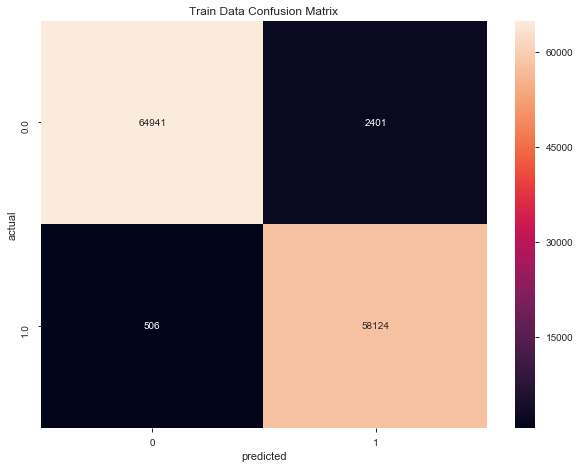

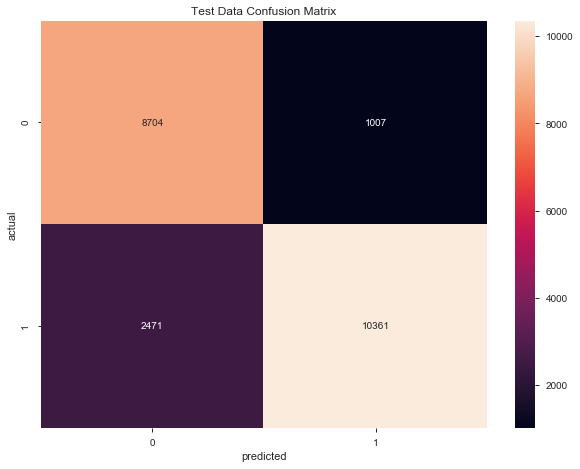

In [115]:
sns.heatmap(pd.crosstab(train_predict['actual'], train_predict['predicted']), annot=True, fmt='.0f')
plt.title('Train Data Confusion Matrix')
plt.show()
sns.heatmap(pd.crosstab(test_predict['actual'], test_predict['predicted']), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix')
plt.show()

In [116]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_predict.actual, train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_predict.actual, test_predict.predicted))

The overall accuracy score for the Train Data is :  0.9769234433048614
The overall accuracy score for the Test Data  is :  0.8457170740362862


In [118]:
print(metrics.classification_report(train_predict.actual, train_predict.predicted))

             precision    recall  f1-score   support

        0.0       0.99      0.96      0.98     67342
        1.0       0.96      0.99      0.98     58630

avg / total       0.98      0.98      0.98    125972



In [166]:
print(metrics.classification_report(test_predict.actual, test_predict.predicted))

             precision    recall  f1-score   support

          0       0.78      0.90      0.83      9711
          1       0.91      0.81      0.86     12832

avg / total       0.85      0.85      0.85     22543



# Building Model using sklearn

As to build a model using sklearn, test and train data should have equal number of features so removing the same redundant and features of no use 

<b> Building model with features selected by RFE-

In [294]:
X_train=train_set[['is_guest_login','last_flag','srv_serror_rate','srv_rerror_rate','duration','diff_srv_rate','flag_S1','service_imap4','service_smtp','service_private','dst_bytes','dst_host_diff_srv_rate','flag_S0','service_eco_i','service_ecr_i']]
y_train = train_set['attack']

x_test=test_set[['is_guest_login','last_flag','srv_serror_rate','srv_rerror_rate','duration','diff_srv_rate','flag_S1','service_imap4','service_smtp','service_private','dst_bytes','dst_host_diff_srv_rate','flag_S0','service_eco_i','service_ecr_i']]
y_test= test_set['attack']

In [306]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.968


In [307]:
results

array([0.96697889, 0.97166217, 0.96904025, 0.96824641, 0.96991347,
       0.96784949, 0.95086132, 0.96856394, 0.96983409, 0.97380329])

In [309]:
#from sklearn.linear_model import LogisticRegression
#from sklearn import metrics
logreg = LogisticRegression()
results =logreg.fit(X_train, y_train)

In [310]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = logreg.predict(x_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[8636 1075]
 [3110 9722]]


In [311]:
#Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.74      0.89      0.80      9711
          1       0.90      0.76      0.82     12832

avg / total       0.83      0.81      0.82     22543



In [312]:
#Predicting the test cases
test_pred = pd.DataFrame( { 'actual':  y_test,
                            'predicted': logreg.predict( x_test ) } )

In [313]:
test_pred = test_pred.reset_index()

In [314]:
#Comparing the predictions with actual test data
test_pred.sample( n = 10 )

index  actual  predicted
5745    5745       1        0.0
18296  18296       0        0.0
16163  16163       0        0.0
3265    3265       1        1.0
2264    2264       1        0.0
11473  11473       0        1.0
18165  18165       1        1.0
924      924       1        0.0
7894    7894       0        1.0
16278  16278       0        0.0

In [315]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix( test_pred.actual,
                            test_pred.predicted, [1,0] )
cm

array([[9722, 3110],
       [1075, 8636]], dtype=int64)

In [316]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Text(0.5,12.5,'Predicted label')

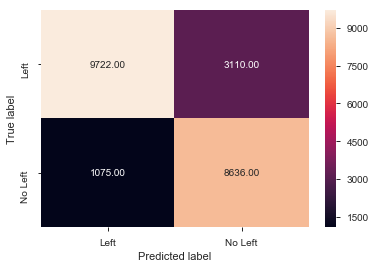

In [317]:
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [318]:
score = metrics.accuracy_score(test_pred.actual,test_pred.predicted )
Logistic_accuracy=round( float(score), 2 )
Logistic_accuracy

0.81

Interpretation: Of the entire test set, 81% ofthe network connections attacks successfully captured,Of the entire test set,88%of the non attacks or normal are captured correctly

# Prediction using Decision Trees

In [247]:
X_train=train_set[['is_guest_login','last_flag','srv_serror_rate','srv_rerror_rate','duration','diff_srv_rate','flag_S1','service_imap4','service_smtp','service_private','dst_bytes','dst_host_diff_srv_rate','flag_S0','service_eco_i','service_ecr_i']]
y_train = train_set['attack']

x_test=test_set[['is_guest_login','last_flag','srv_serror_rate','srv_rerror_rate','duration','diff_srv_rate','flag_S1','service_imap4','service_smtp','service_private','dst_bytes','dst_host_diff_srv_rate','flag_S0','service_eco_i','service_ecr_i']]
y_test= test_set['attack']

In [248]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, export
from sklearn.model_selection import GridSearchCV

In [249]:
clf_tree = DecisionTreeClassifier( max_depth = 3 )
clf_tree=clf_tree.fit(X_train, y_train )

In [250]:
pd.DataFrame(clf_tree.predict_proba(X_train)).head()

0         1
0  0.018824  0.981176
1  0.018824  0.981176
2  0.999622  0.000378
3  0.999622  0.000378
4  0.018824  0.981176

Fine Tuning the parameters

In [251]:
param_grid = {'max_depth': np.arange(3,23),
             'max_features': np.arange(3,12)}

In [252]:
clf_tree = DecisionTreeClassifier(max_depth = 5, max_features=10)

In [253]:
clf_tree.fit(X_train, y_train )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [254]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 7)
tree.fit( X_train,y_train )

GridSearchCV(cv=7, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22]), 'max_features': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [255]:
tree.best_score_

0.9943876416981552

In [256]:
tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=16,
            max_features=11, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [257]:
tree.best_params_

{'max_depth': 16, 'max_features': 11}

In [258]:
train_pred = tree.predict(X_train)

In [259]:
print(metrics.classification_report(y_train, train_pred))

             precision    recall  f1-score   support

        0.0       1.00      0.99      1.00     67342
        1.0       0.99      1.00      1.00     58630

avg / total       1.00      1.00      1.00    125972



In [260]:
test_pred = tree.predict(x_test)

In [261]:
print(metrics.classification_report(y_test, test_pred))

             precision    recall  f1-score   support

          0       0.71      0.96      0.81      9711
          1       0.96      0.70      0.81     12832

avg / total       0.85      0.81      0.81     22543



Building Final Decision Tree Model

In [262]:
clf_tree = DecisionTreeClassifier( max_depth = 16, max_features=11, max_leaf_nodes=5 )
clf_tree.fit(X_train,y_train )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=16,
            max_features=11, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Feature Relative Importance

In [263]:
clf_tree.feature_importances_

array([0.        , 0.15759125, 0.        , 0.        , 0.        ,
       0.08847828, 0.        , 0.        , 0.        , 0.        ,
       0.75393047, 0.        , 0.        , 0.        , 0.        ])

In [264]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X_train.columns, clf_tree.feature_importances_)]

feature_map

[('is_guest_login', 0.0),
 ('last_flag', 0.15759125458116804),
 ('srv_serror_rate', 0.0),
 ('srv_rerror_rate', 0.0),
 ('duration', 0.0),
 ('diff_srv_rate', 0.08847827696645776),
 ('flag_S1', 0.0),
 ('service_imap4', 0.0),
 ('service_smtp', 0.0),
 ('service_private', 0.0),
 ('dst_bytes', 0.7539304684523742),
 ('dst_host_diff_srv_rate', 0.0),
 ('flag_S0', 0.0),
 ('service_eco_i', 0.0),
 ('service_ecr_i', 0.0)]

In [265]:
Feature_importance = pd.DataFrame(feature_map, columns=['Feature', 'importance'])
Feature_importance.sort_values('importance', inplace=True, ascending=False)
Feature_importance

Feature  importance
10               dst_bytes    0.753930
1                last_flag    0.157591
5            diff_srv_rate    0.088478
0           is_guest_login    0.000000
2          srv_serror_rate    0.000000
3          srv_rerror_rate    0.000000
4                 duration    0.000000
6                  flag_S1    0.000000
7            service_imap4    0.000000
8             service_smtp    0.000000
9          service_private    0.000000
11  dst_host_diff_srv_rate    0.000000
12                 flag_S0    0.000000
13           service_eco_i    0.000000
14           service_ecr_i    0.000000

In [266]:
tree_test_pred = pd.DataFrame( { 'actual':  y_test,
                            'predicted': clf_tree.predict( x_test ) } )

In [267]:
Decision_accuracy=metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )
Decision_accuracy

0.929157609901078

Text(0.5,12.5,'Predicted label')

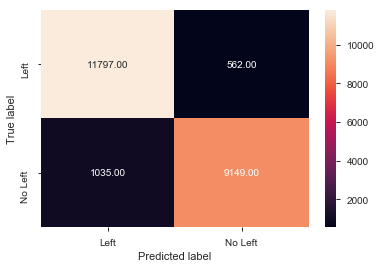

In [268]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

# Model Building using Random Forest

In [269]:
from sklearn.ensemble import RandomForestClassifier

radm_clf = RandomForestClassifier(oob_score=True,n_estimators=170 , max_features=6, n_jobs=-1)
radm_clf.fit(X_train, y_train )

C:\Users\Aanchal\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=170, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [270]:
radm_test_pred = pd.DataFrame( { 'actual':  y_test,
                            'predicted': radm_clf.predict( x_test ) } )

metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted )

0.8038859069334161

Text(0.5,12.5,'Predicted label')

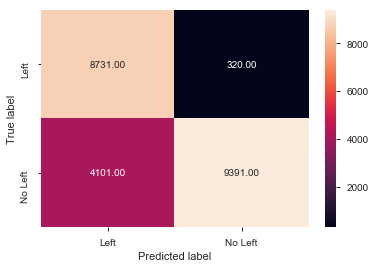

In [271]:
tree_cm = metrics.confusion_matrix( radm_test_pred.predicted,
                                 radm_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

Feature importance from the Random Forest Model

In [272]:
radm_clf.feature_importances_

indices = np.argsort(radm_clf.feature_importances_)[::-1]

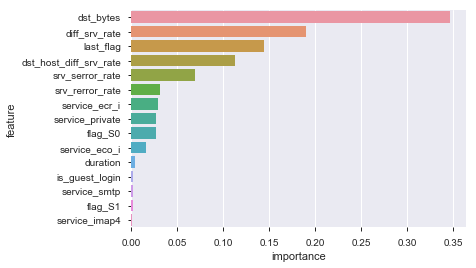

In [273]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(X_train.shape[1]):
  feature_rank.loc[f] = [f+1,
                         X_train.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sn.barplot( y = 'feature', x = 'importance', data = feature_rank )

Note: As per the model, the most important features ,in descending order, are

Tuning parameters

In [274]:
pargrid_ada = {'n_estimators': [100,150,200,250,280,300],
                'max_features': [5,6,7,8,9,10,11,12]}

from sklearn.grid_search import GridSearchCV
gscv_Rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

C:\Users\Aanchal\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Aanchal\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [275]:
gscv_results = gscv_Rf.fit(X_train, y_train)
gscv_results.best_score_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 30.1min finished


0.9947528022100149

In [278]:
gscv_results.best_params_

{'max_features': 10, 'n_estimators': 100}

In [279]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=100 , max_features=10, n_jobs=-1)

In [280]:
radm_clf.fit(X_train,y_train )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [281]:
radm_clf.feature_importances_

array([2.08623407e-03, 1.48094599e-01, 2.98976082e-02, 1.30578857e-02,
       3.12024228e-03, 2.06983274e-01, 1.01345327e-03, 1.96346962e-04,
       5.54976593e-04, 1.88499567e-02, 4.65780933e-01, 6.99902086e-02,
       4.42274178e-03, 1.15073307e-02, 2.44442083e-02])

In [282]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X_train.columns, radm_clf.feature_importances_)]

feature_map

[('is_guest_login', 0.0020862340741943652),
 ('last_flag', 0.14809459949756454),
 ('srv_serror_rate', 0.029897608206059575),
 ('srv_rerror_rate', 0.013057885656153631),
 ('duration', 0.0031202422816048003),
 ('diff_srv_rate', 0.20698327446992287),
 ('flag_S1', 0.0010134532669951771),
 ('service_imap4', 0.00019634696158151116),
 ('service_smtp', 0.0005549765929755917),
 ('service_private', 0.018849956722709723),
 ('dst_bytes', 0.4657809329084692),
 ('dst_host_diff_srv_rate', 0.06999020861800229),
 ('flag_S0', 0.00442274178151702),
 ('service_eco_i', 0.011507330650784617),
 ('service_ecr_i', 0.024444208311465387)]

In [283]:
Feature_importance = pd.DataFrame(feature_map, columns=['Feature', 'importance'])
Feature_importance.sort_values('importance', inplace=True, ascending=False)
Feature_importance

Feature  importance
10               dst_bytes    0.465781
5            diff_srv_rate    0.206983
1                last_flag    0.148095
11  dst_host_diff_srv_rate    0.069990
2          srv_serror_rate    0.029898
14           service_ecr_i    0.024444
9          service_private    0.018850
3          srv_rerror_rate    0.013058
13           service_eco_i    0.011507
12                 flag_S0    0.004423
4                 duration    0.003120
0           is_guest_login    0.002086
6                  flag_S1    0.001013
8             service_smtp    0.000555
7            service_imap4    0.000196

In [284]:
Rtree_test_pred = pd.DataFrame( { 'actual':  y_test,
                            'predicted': radm_clf.predict( x_test ) } )

In [287]:
Random_accuracy=metrics.accuracy_score(Rtree_test_pred.actual, Rtree_test_pred.predicted )
Random_accuracy

0.8011356075056558

In [286]:
print(metrics.classification_report(y_test, radm_clf.predict( x_test )))


             precision    recall  f1-score   support

          0       0.69      0.97      0.81      9711
          1       0.96      0.68      0.79     12832

avg / total       0.85      0.80      0.80     22543



# Model building by Support Vector Machines (SVC)

In [288]:
from sklearn.svm import SVC
#from sklearn.decomposition import RandomizedPCA
from sklearn.pipeline import make_pipeline

#pca = RandomizedPCA(n_components=10, whiten=True, random_state=42)
#svc = SVC(kernel='rbf', class_weight='balanced')
#model = make_pipeline(pca, svc)
model = SVC(kernel='rbf', class_weight='balanced')

In [344]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [343]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 5, 10, 50], 'gamma': [0.0001, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [345]:
print(grid.best_params_)

{'C': 50, 'gamma': 0.005}


In [346]:
model = grid.best_estimator_
yfit = model.predict(x_test)

In [347]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yfit))

             precision    recall  f1-score   support

          0       0.75      0.96      0.84      9711
          1       0.96      0.76      0.85     12832

avg / total       0.87      0.85      0.85     22543



In [348]:
SVC_accuracy= metrics.accuracy_score( y_test, yfit )
SVC_accuracy

0.8453178370225791

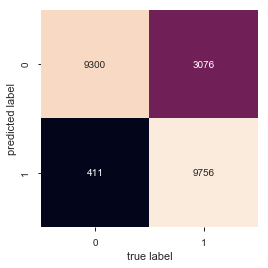

In [349]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Building Model by Naive Bayes

In [321]:
import sklearn.naive_bayes as nb

In [322]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sn
from sklearn.grid_search import GridSearchCV

In [323]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB(priors=None)

Text(0.5,12.5,'Predicted label')

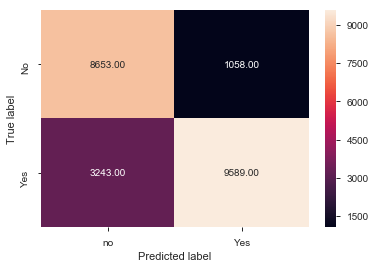

In [324]:
nb_cm = metrics.confusion_matrix( y_test,nb_clf.predict( x_test) )
sn.heatmap(nb_cm, annot=True,  fmt='.2f', xticklabels = ["no", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [325]:
NB_accuracy= metrics.accuracy_score( y_test, nb_clf.predict( x_test ) )

In [326]:
NB_accuracy

0.809209067116178

# Building Model by KNN

In [327]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sn
from sklearn.grid_search import GridSearchCV

In [328]:
tuned_parameters = [{'n_neighbors': [3,5, 7, 9,11]}]

knn_clf = GridSearchCV(KNeighborsClassifier(),
                   tuned_parameters,
                   cv=5,
                   scoring='accuracy')

In [330]:
knn_clf.fit(X_train,y_train)

knn_clf.best_score_

0.9932921601625758

In [331]:
knn_clf.best_params_

{'n_neighbors': 3}

In [332]:
#Building for the n_neighbors=3
knn_clf = KNeighborsClassifier( n_neighbors =3 )

In [333]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [334]:
knn_cm = metrics.confusion_matrix(y_test, knn_clf.predict(x_test ) )

Text(0.5,12.5,'Predicted label')

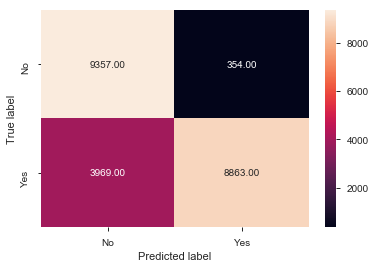

In [335]:
sn.heatmap(knn_cm, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [338]:
knn_accuracy=metrics.accuracy_score(y_test, knn_clf.predict(x_test))
knn_accuracy

0.808233154416005

# Model Accuracies

In [350]:
first_model = {'Model': ['Logistic Regression', 'Decision Tree', 'RandomForest', 'SVC', 'NB','KNN'],
               'accuracy' : [Logistic_accuracy, Decision_accuracy, Random_accuracy, SVC_accuracy, NB_accuracy,knn_accuracy]}

result_df = pd.DataFrame(data = first_model)
result_df

Model  accuracy
0  Logistic Regression  0.810000
1        Decision Tree  0.929158
2         RandomForest  0.801136
3                  SVC  0.845318
4                   NB  0.809209
5                  KNN  0.808233

[Text(0,0,'Logistic Regression'),
 Text(0,0,'Decision Tree'),
 Text(0,0,'RandomForest'),
 Text(0,0,'SVC'),
 Text(0,0,'NB'),
 Text(0,0,'KNN')]

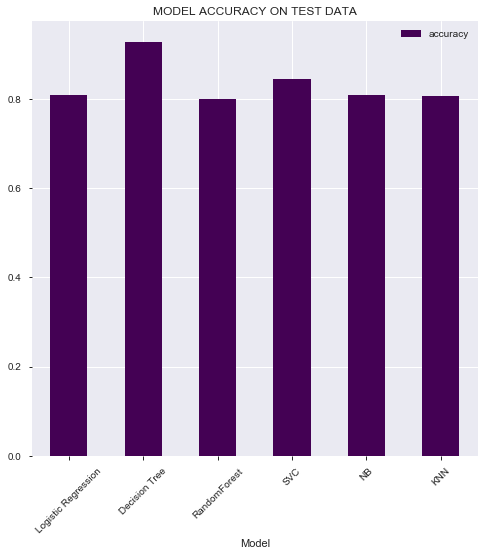

In [351]:
r1 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='MODEL ACCURACY ON TEST DATA', colormap=plt.cm.viridis,
               sort_columns=True)
r1.set_xticklabels(result_df.Model, rotation = 45)